In [6]:
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 300

In [7]:
# Define constants and get matchup scores

LEAGUE_ID = 319300
YEAR = 2024
BASE_URL = "https://lm-api-reads.fantasy.espn.com/apis/v3/games/ffl/seasons/{}/segments/0/leagues/{}".format(YEAR, LEAGUE_ID)

w = requests.get(BASE_URL).json()
REG_SEASON_WEEK = min(w["status"]["currentMatchupPeriod"], 14)

r = requests.get(BASE_URL, params={"view": "mMatchup", "view": "mMatchupScore"}).json()

In [8]:
# Get team names and store in map

t = requests.get(BASE_URL, params={"view": "mTeam"}).json()
teams = t["teams"]

team_map = {}
for i in range(len(teams)):
    team_map[teams[i]["id"]] = {"name": teams[i]["name"]}

In [9]:
# Create dataframes

scores, margins = {}, {}
for i in range(1,11):
    scores[i] = []
    margins[i] = []

for game in r["schedule"][:REG_SEASON_WEEK * 5]:
    scores[game["home"]["teamId"]].append(game['home']['totalPoints'])
    scores[game["away"]["teamId"]].append(game["away"]["totalPoints"])
    margins[game["home"]["teamId"]].append(game['home']['totalPoints'] - game['away']['totalPoints'])
    margins[game["away"]["teamId"]].append(game['away']['totalPoints'] - game['home']['totalPoints'])
    
col_hdrs = ["Week{}".format(i) for i in range(1,REG_SEASON_WEEK+1)]

scores_df = pd.DataFrame.from_dict(scores, orient='index', columns=col_hdrs)
margins_df = pd.DataFrame.from_dict(margins, orient='index', columns=col_hdrs)

for col in scores_df:
    m = scores_df[col].median()
    scores_df[col] = scores_df[col].apply(lambda x: x - m)

In [10]:
margins_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,-28.64,109.94,9.12,11.80,14.86,-8.52,40.20,14.06,15.66,50.00,-46.04,26.34,14.74,-23.98
2,37.12,-2.22,-20.30,-61.00,3.28,1.10,-40.20,-14.68,20.68,-45.28,17.54,-52.08,-23.54,-6.52
3,1.72,2.52,47.84,9.18,-55.10,8.52,-31.62,14.68,-45.08,-31.56,17.16,13.58,-30.10,3.58
4,28.64,2.22,-71.22,55.58,55.10,33.22,-32.50,-11.54,-3.30,-50.00,-17.54,-16.94,74.80,-3.58
5,-1.72,23.08,71.22,73.96,7.20,-7.36,17.28,-14.06,-20.68,31.56,15.02,16.94,30.88,26.32
6,-7.56,-1.34,-9.12,61.00,-7.20,14.08,32.50,18.20,45.08,83.24,-36.98,-26.34,23.54,-26.32
7,7.56,-2.52,50.58,-11.80,-3.28,7.36,-36.64,11.54,-9.60,-83.24,-17.16,17.64,-14.74,6.52
8,6.64,1.34,-50.58,-9.18,-14.86,-1.10,-17.28,32.70,3.30,-73.88,36.98,-17.64,30.10,23.98
9,-6.64,-109.94,20.30,-73.96,33.38,-33.22,31.62,-18.20,9.60,73.88,46.04,52.08,-30.88,64.96
10,-37.12,-23.08,-47.84,-55.58,-33.38,-14.08,36.64,-32.70,-15.66,45.28,-15.02,-13.58,-74.80,-64.96


In [11]:
scores_df

,Week1,Week2,Week3,Week4,Week5,Week6,Week7,Week8,Week9,Week10,Week11,Week12,Week13,Week14
1,1.36,34.29,-2.65,20.68,9.06,29.03,28.87,20.77,25.62,39.47,-3.28,-7.06,-18.06,10.54
2,6.66,-1.11,-17.65,-78.70,4.96,-13.53,-11.33,-17.83,2.92,-12.35,20.30,-0.64,-3.08,-18.80
3,3.24,15.97,6.69,2.22,-45.12,37.55,-25.03,-3.15,-48.00,-21.03,0.70,0.64,-21.26,-10.54
4,30.00,1.11,-19.45,53.36,9.98,6.87,17.89,-12.29,3.00,-10.53,2.76,1.18,39.82,-14.12
5,1.52,18.17,51.77,68.42,-1.68,-14.23,10.69,6.71,-17.76,10.53,-0.70,18.12,33.96,49.06
6,-8.92,-9.51,-11.77,-17.70,-8.88,33.71,50.39,8.15,-2.92,51.33,-31.62,-33.40,20.46,22.74
7,-1.36,13.45,56.95,8.88,1.68,-6.87,-58.53,-0.75,-37.70,-31.91,-16.46,5.52,-32.80,-12.28
8,-11.96,-8.17,6.37,-6.96,-5.80,-14.63,-6.59,33.45,6.30,-19.53,5.36,-12.12,8.84,34.52
9,-18.60,-75.65,2.65,-5.54,12.90,-26.35,6.59,-10.05,-28.10,54.35,42.76,51.44,3.08,52.38
10,-30.46,-4.91,-41.15,-2.22,-20.48,19.63,-21.89,0.75,9.96,32.93,-15.72,-12.94,-34.98,-12.58


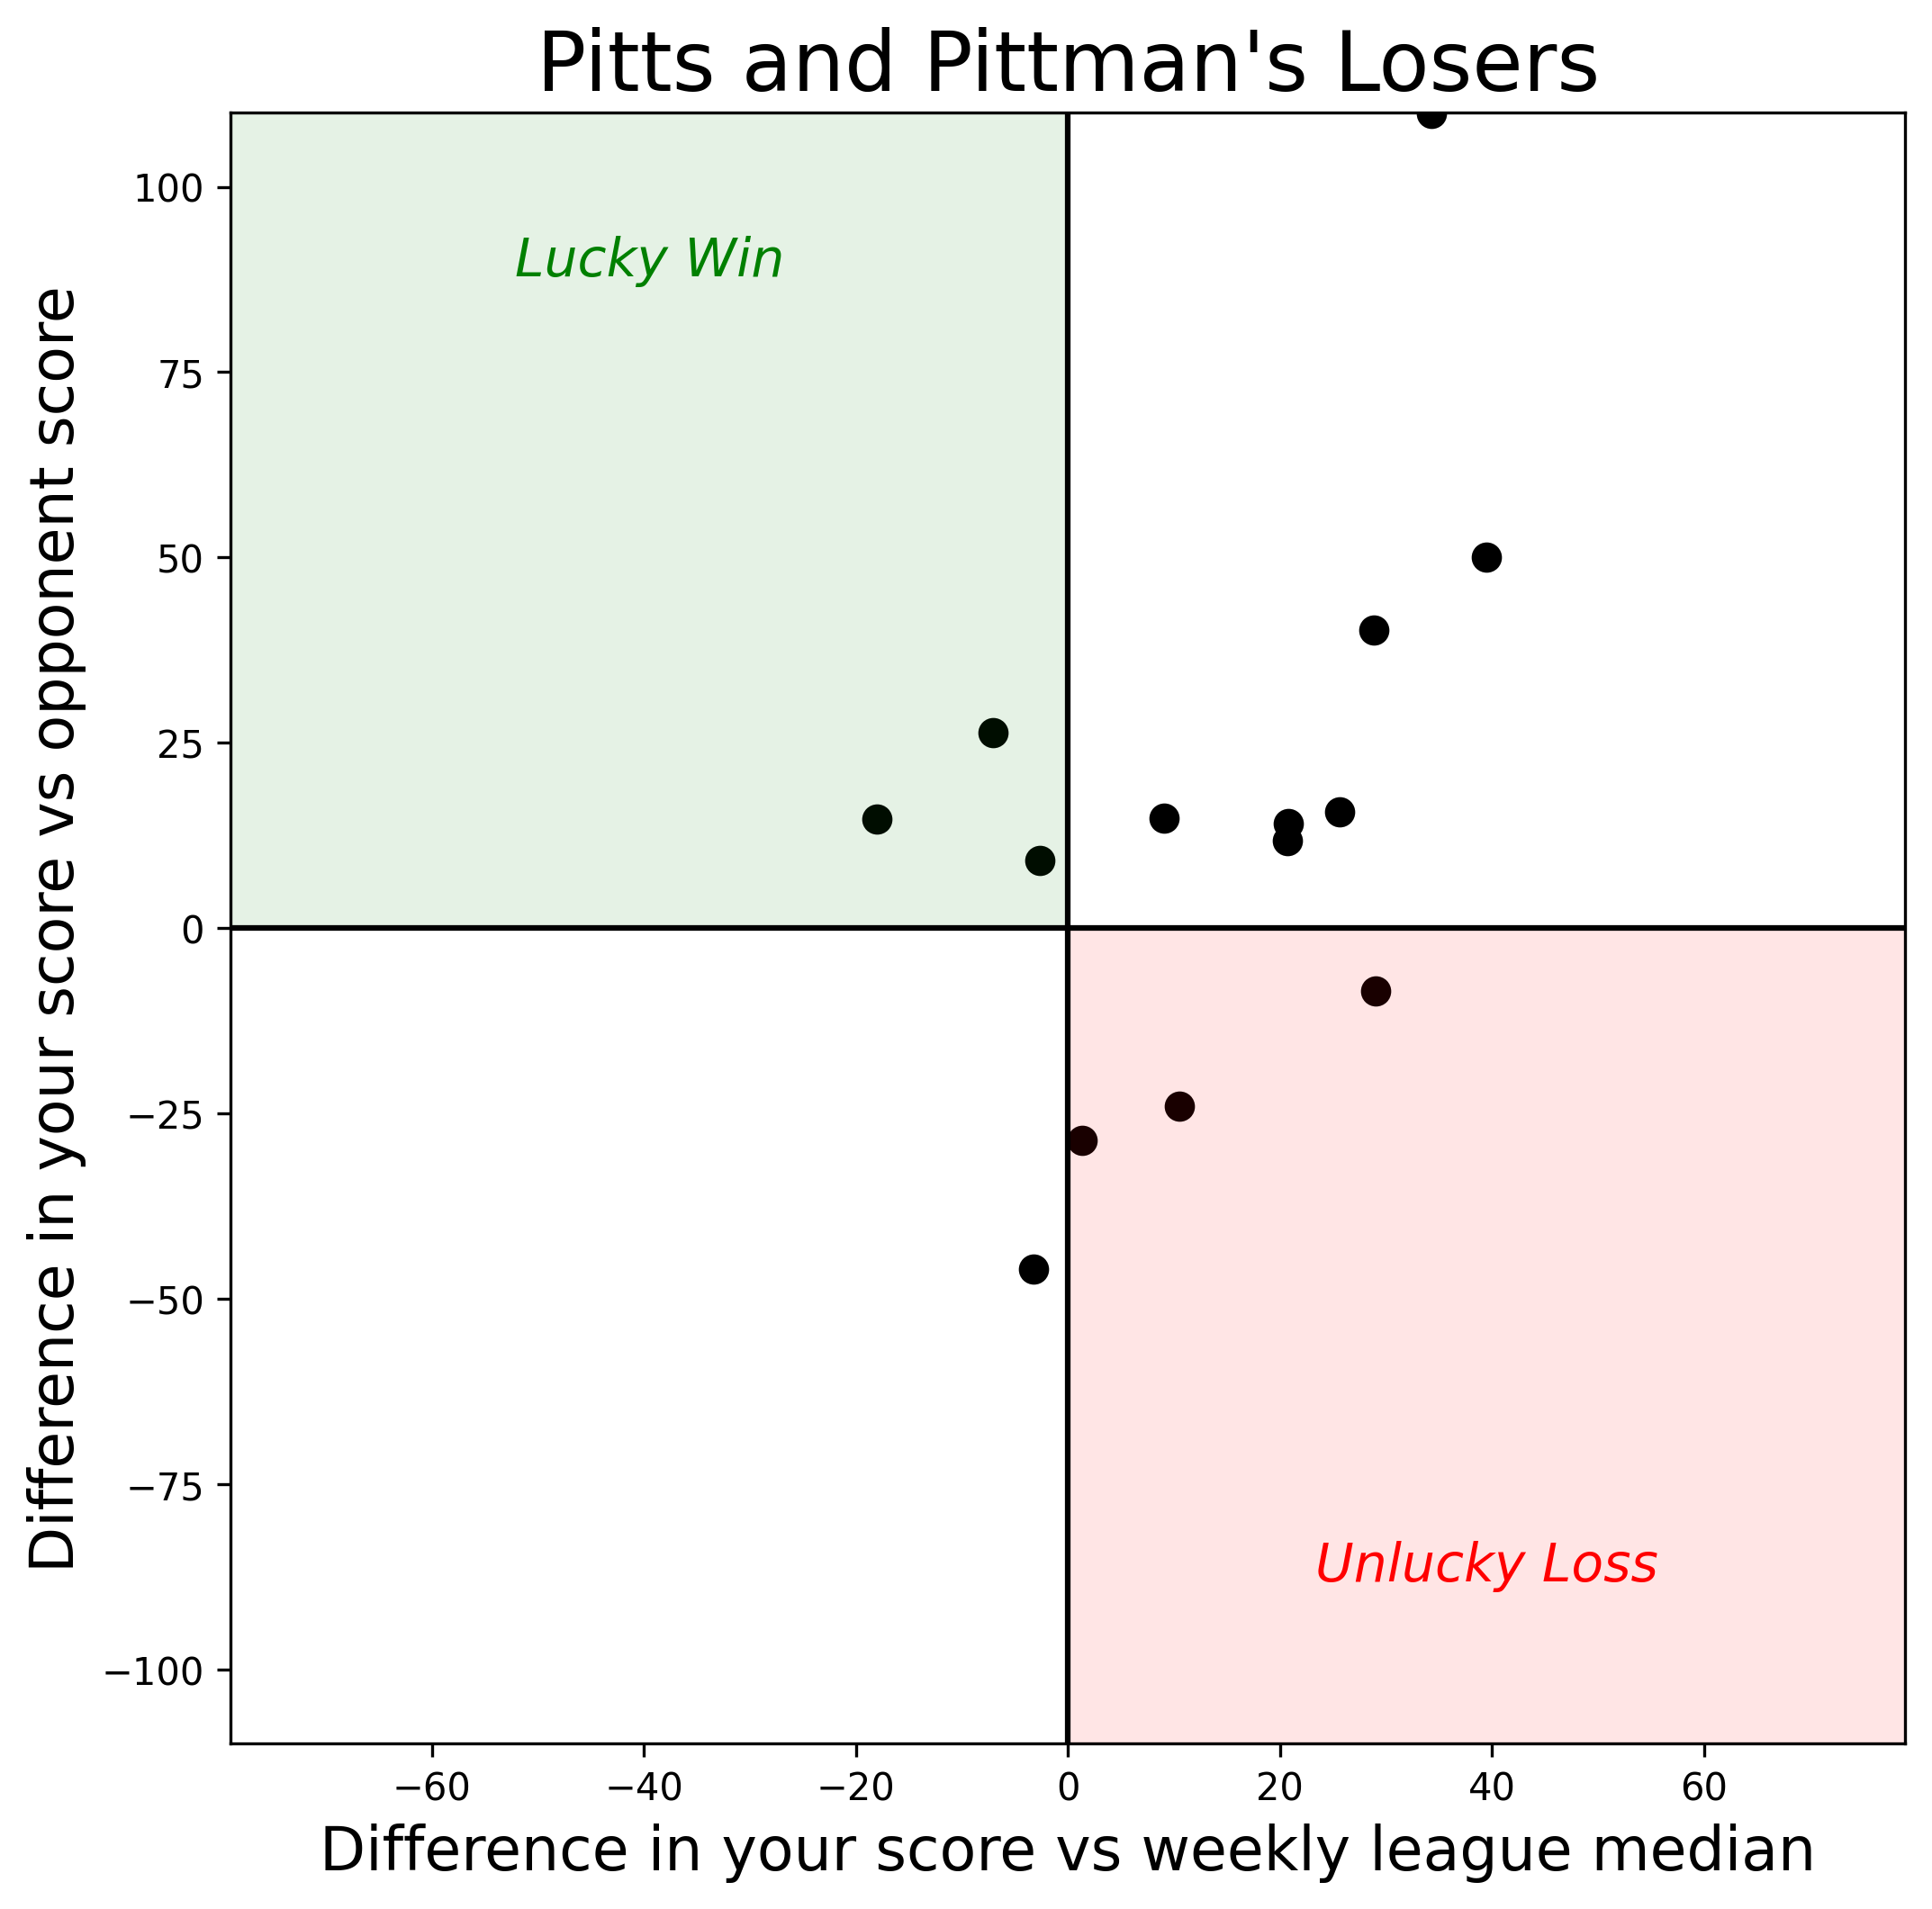

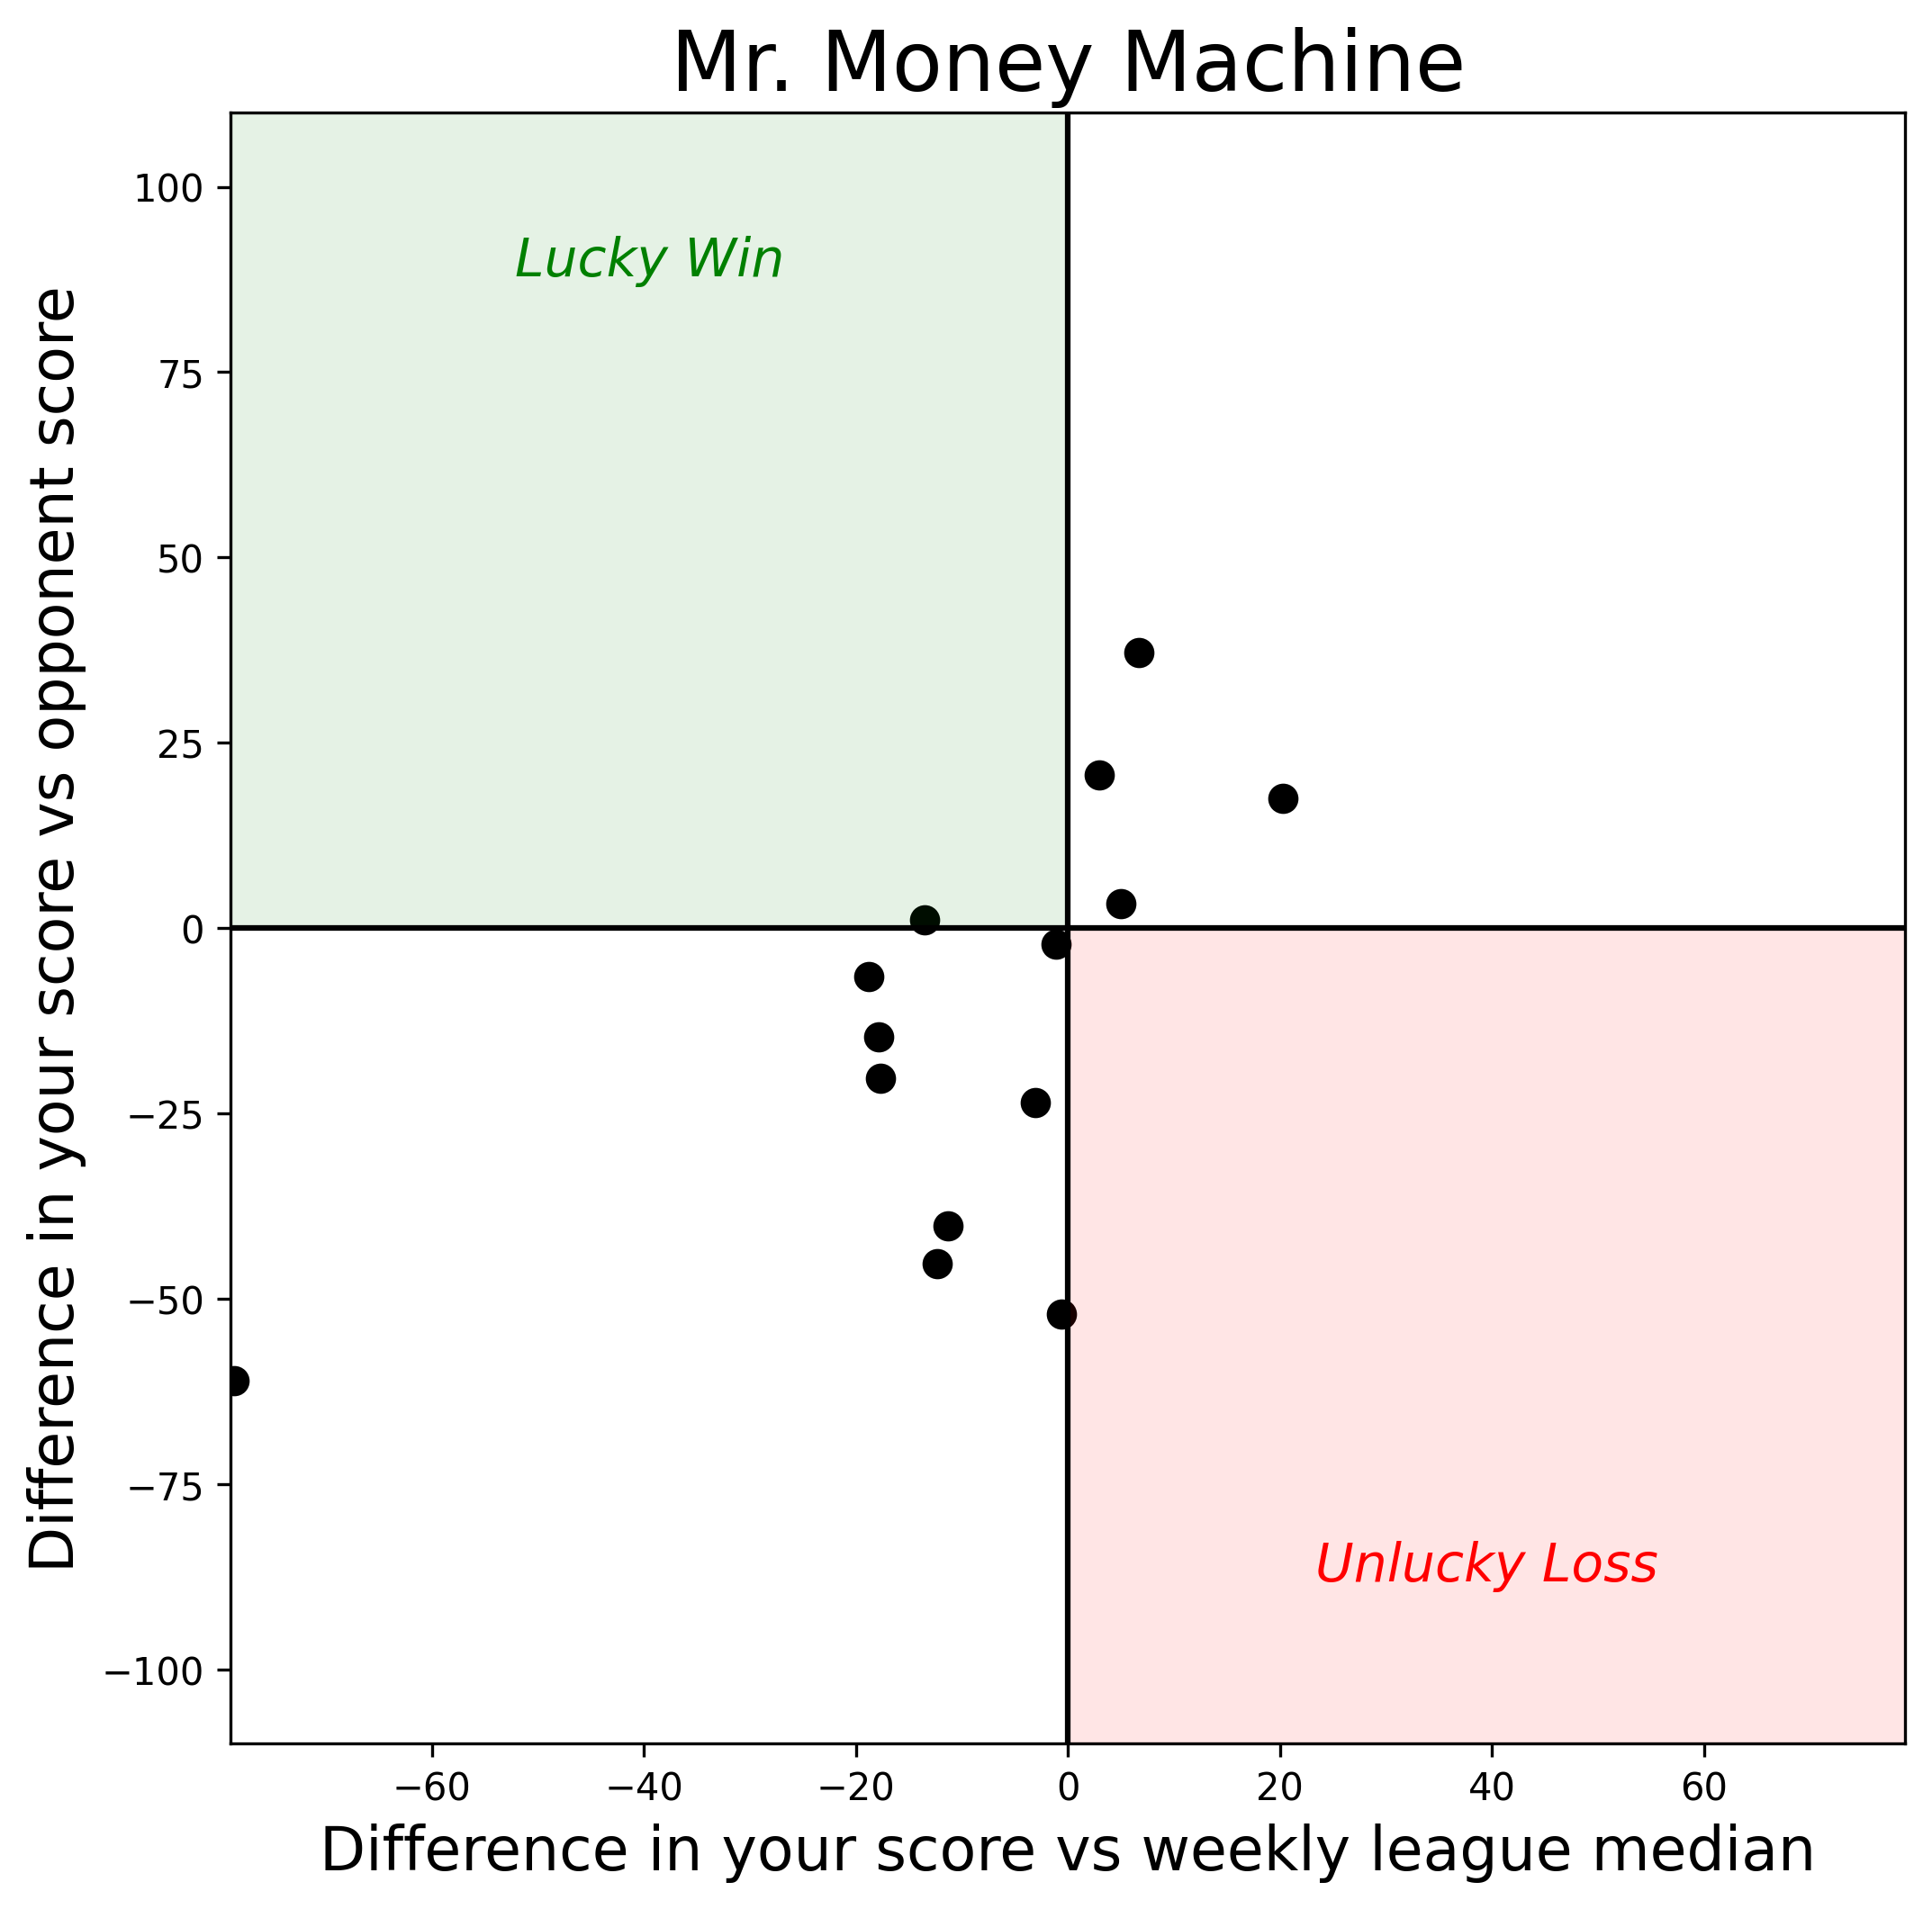

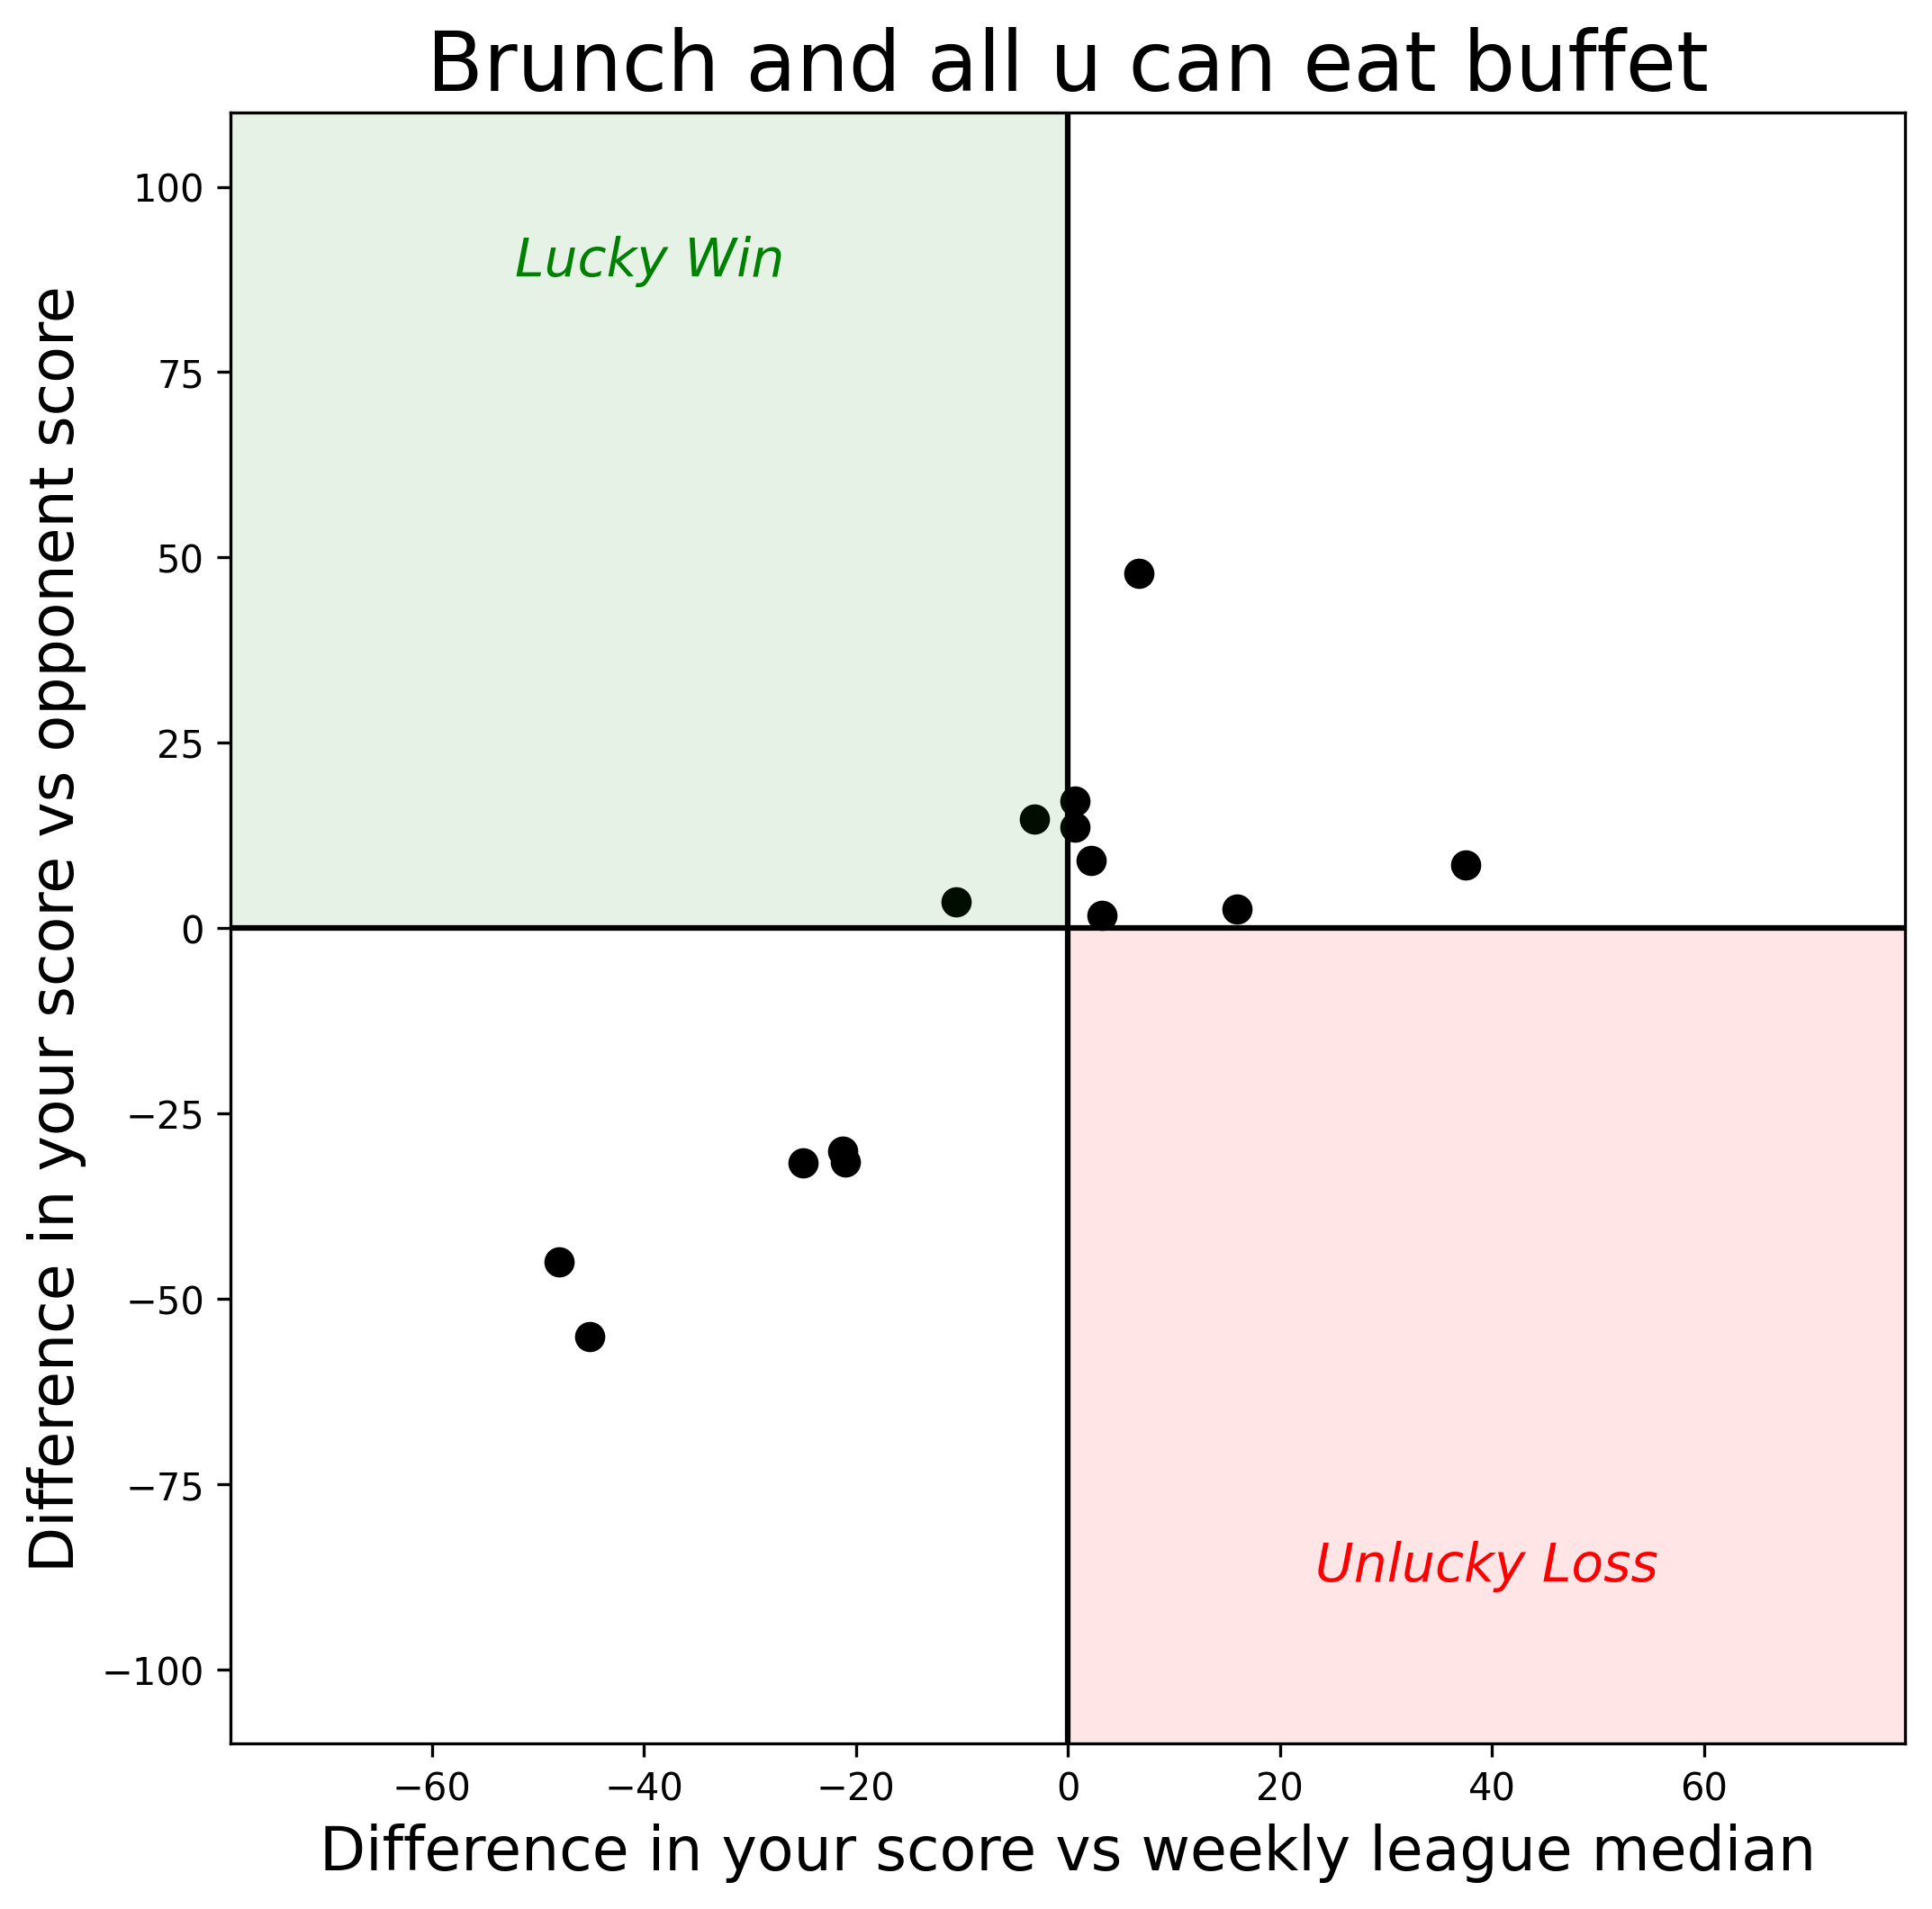

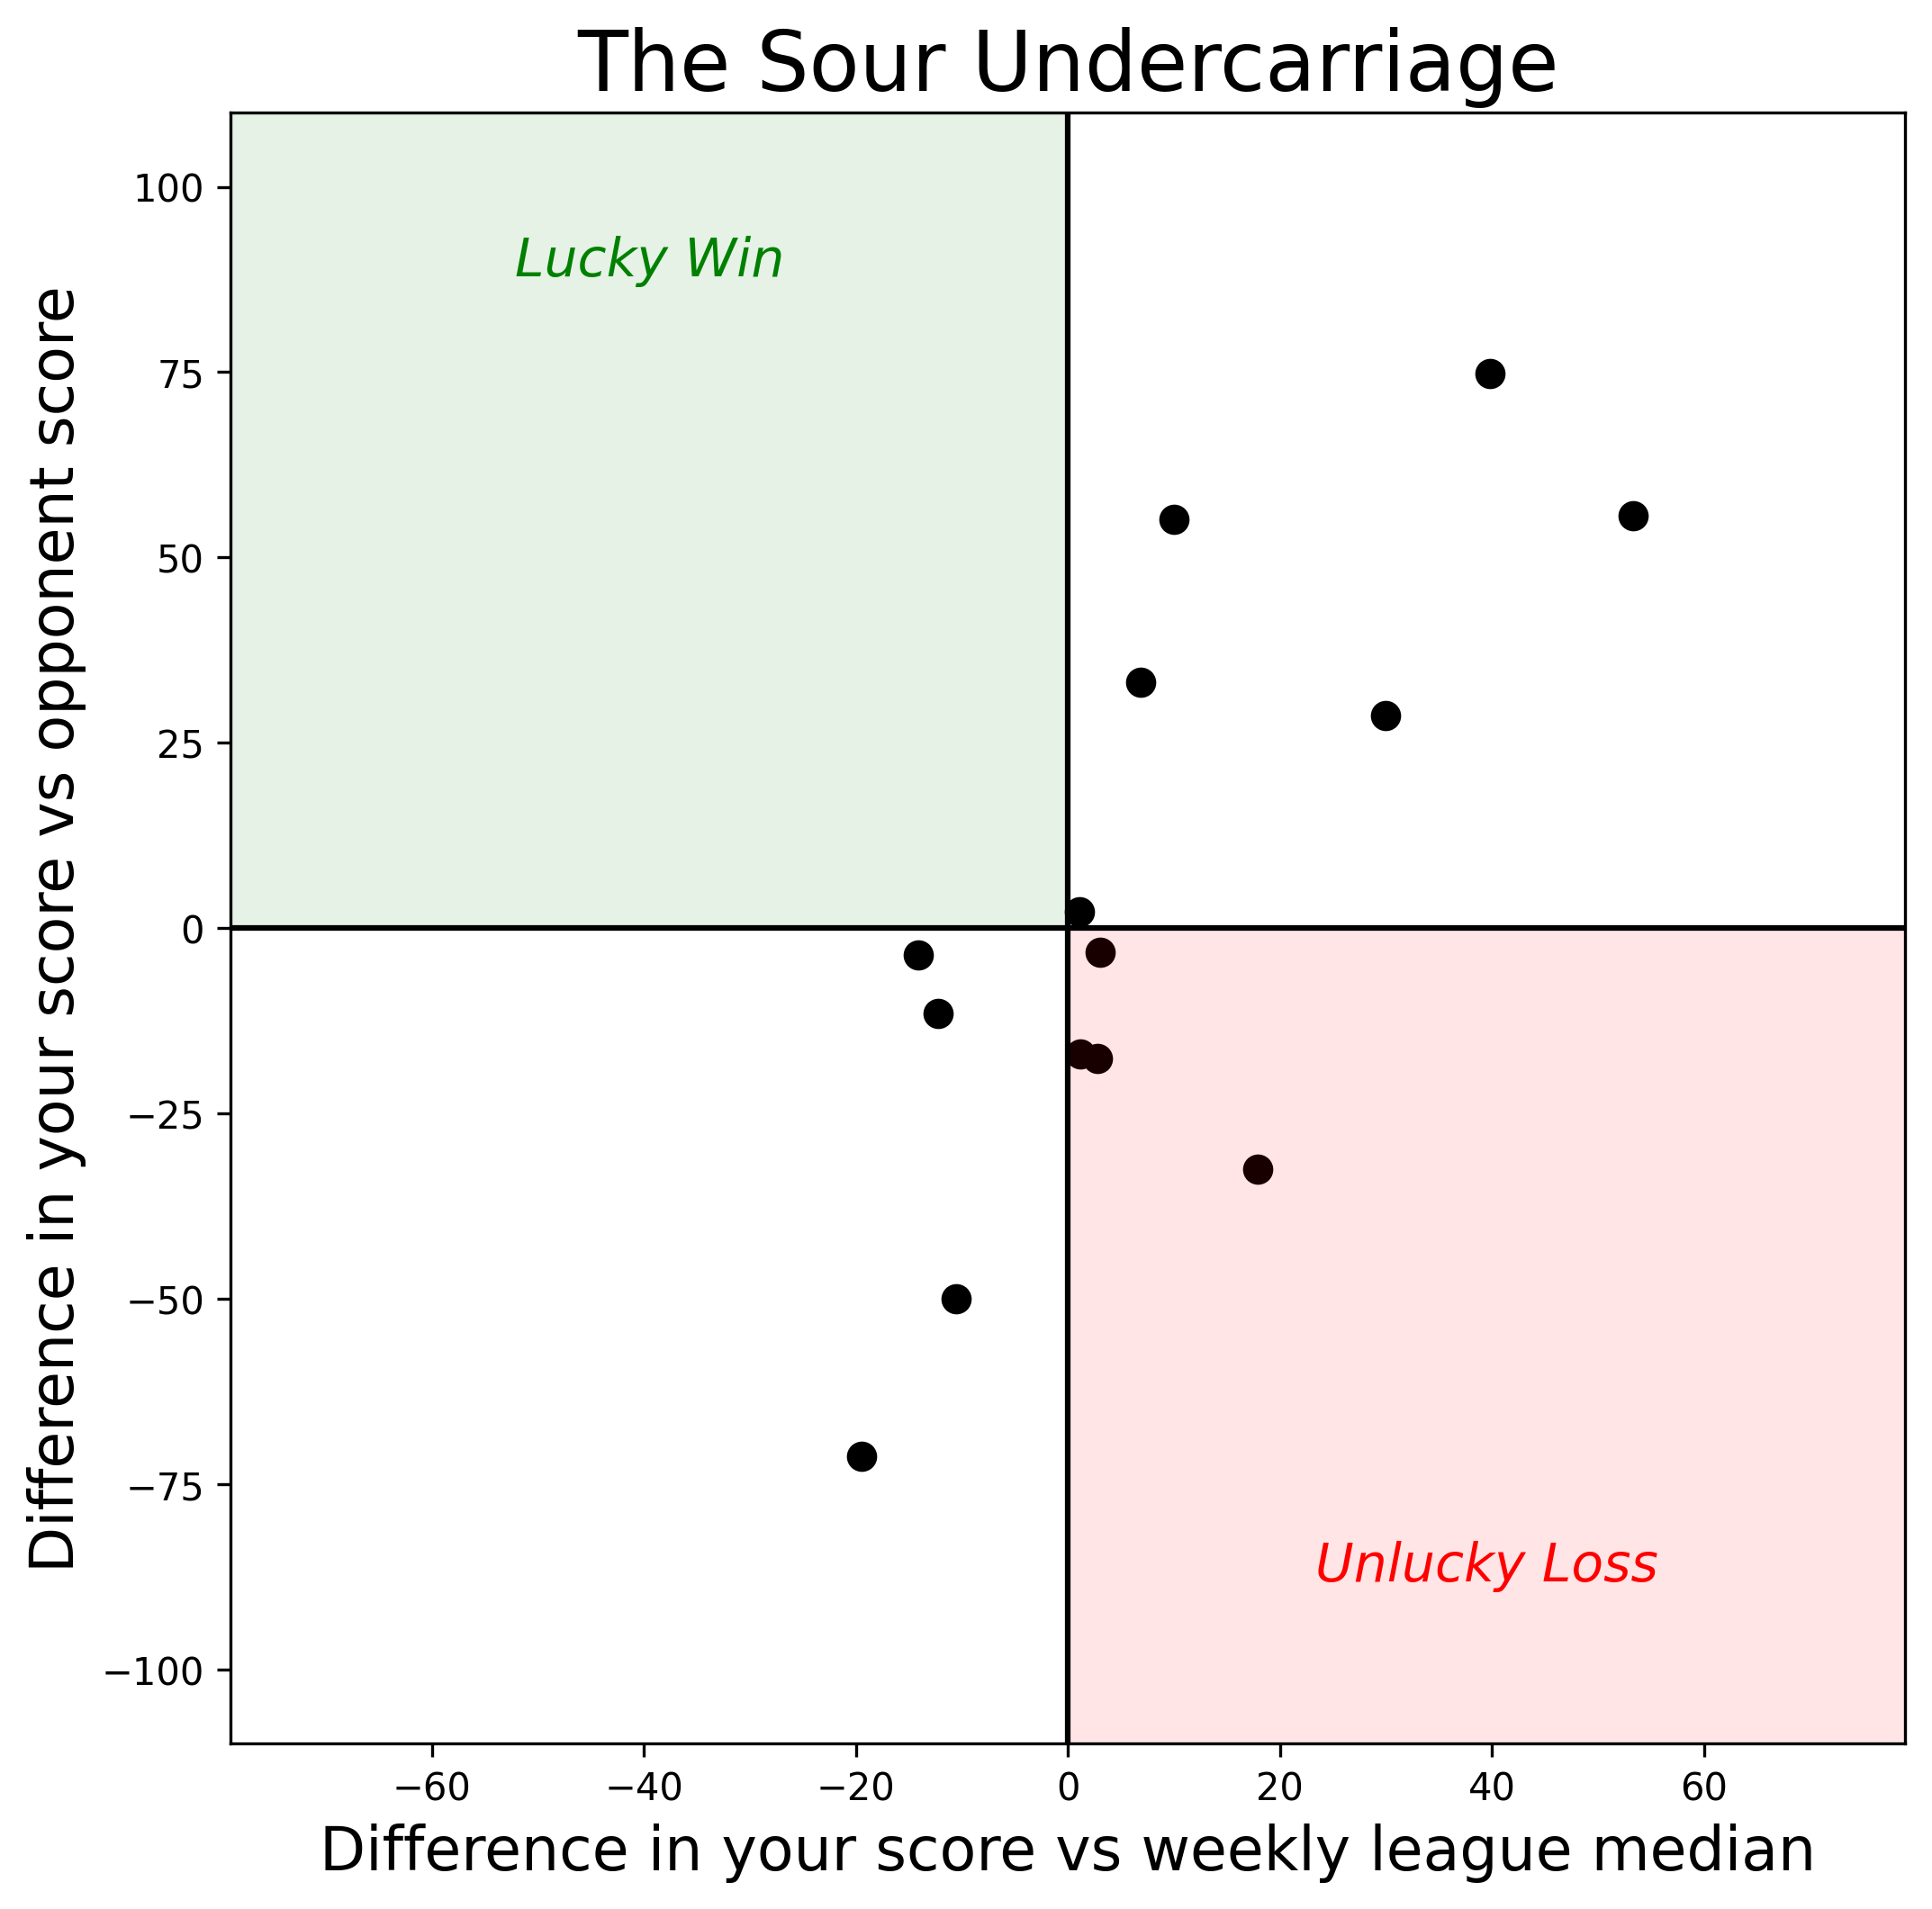

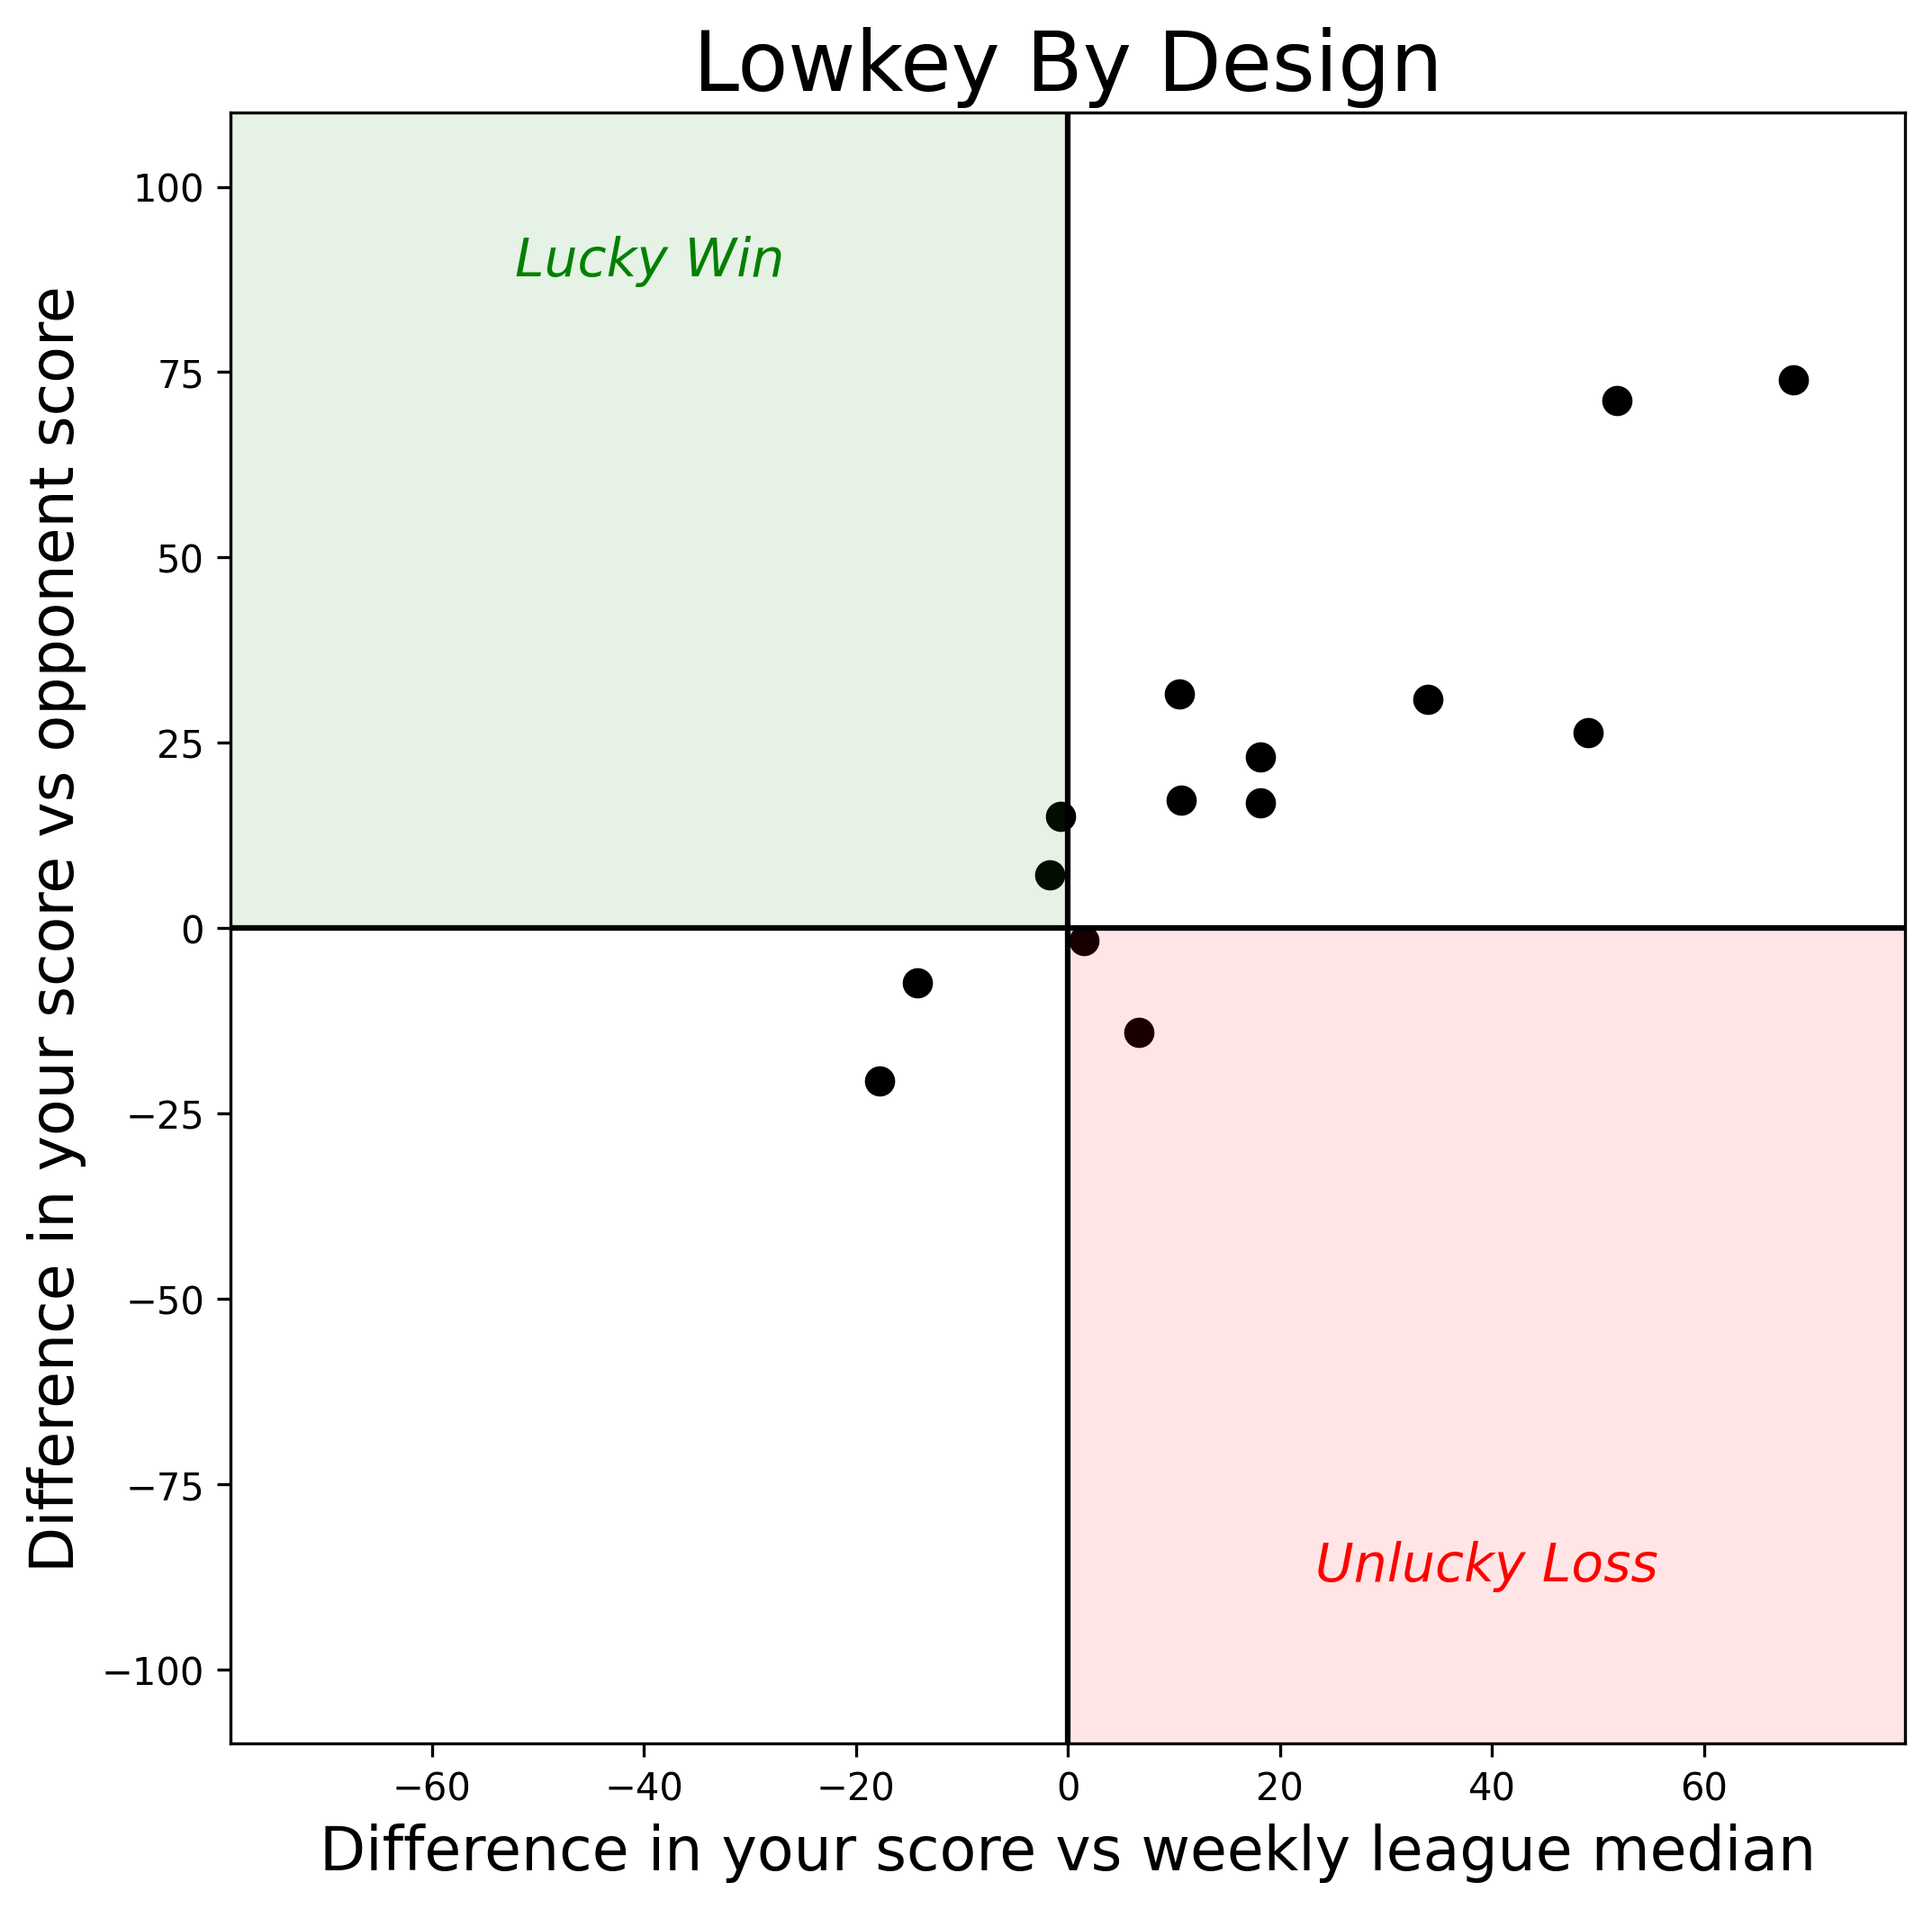

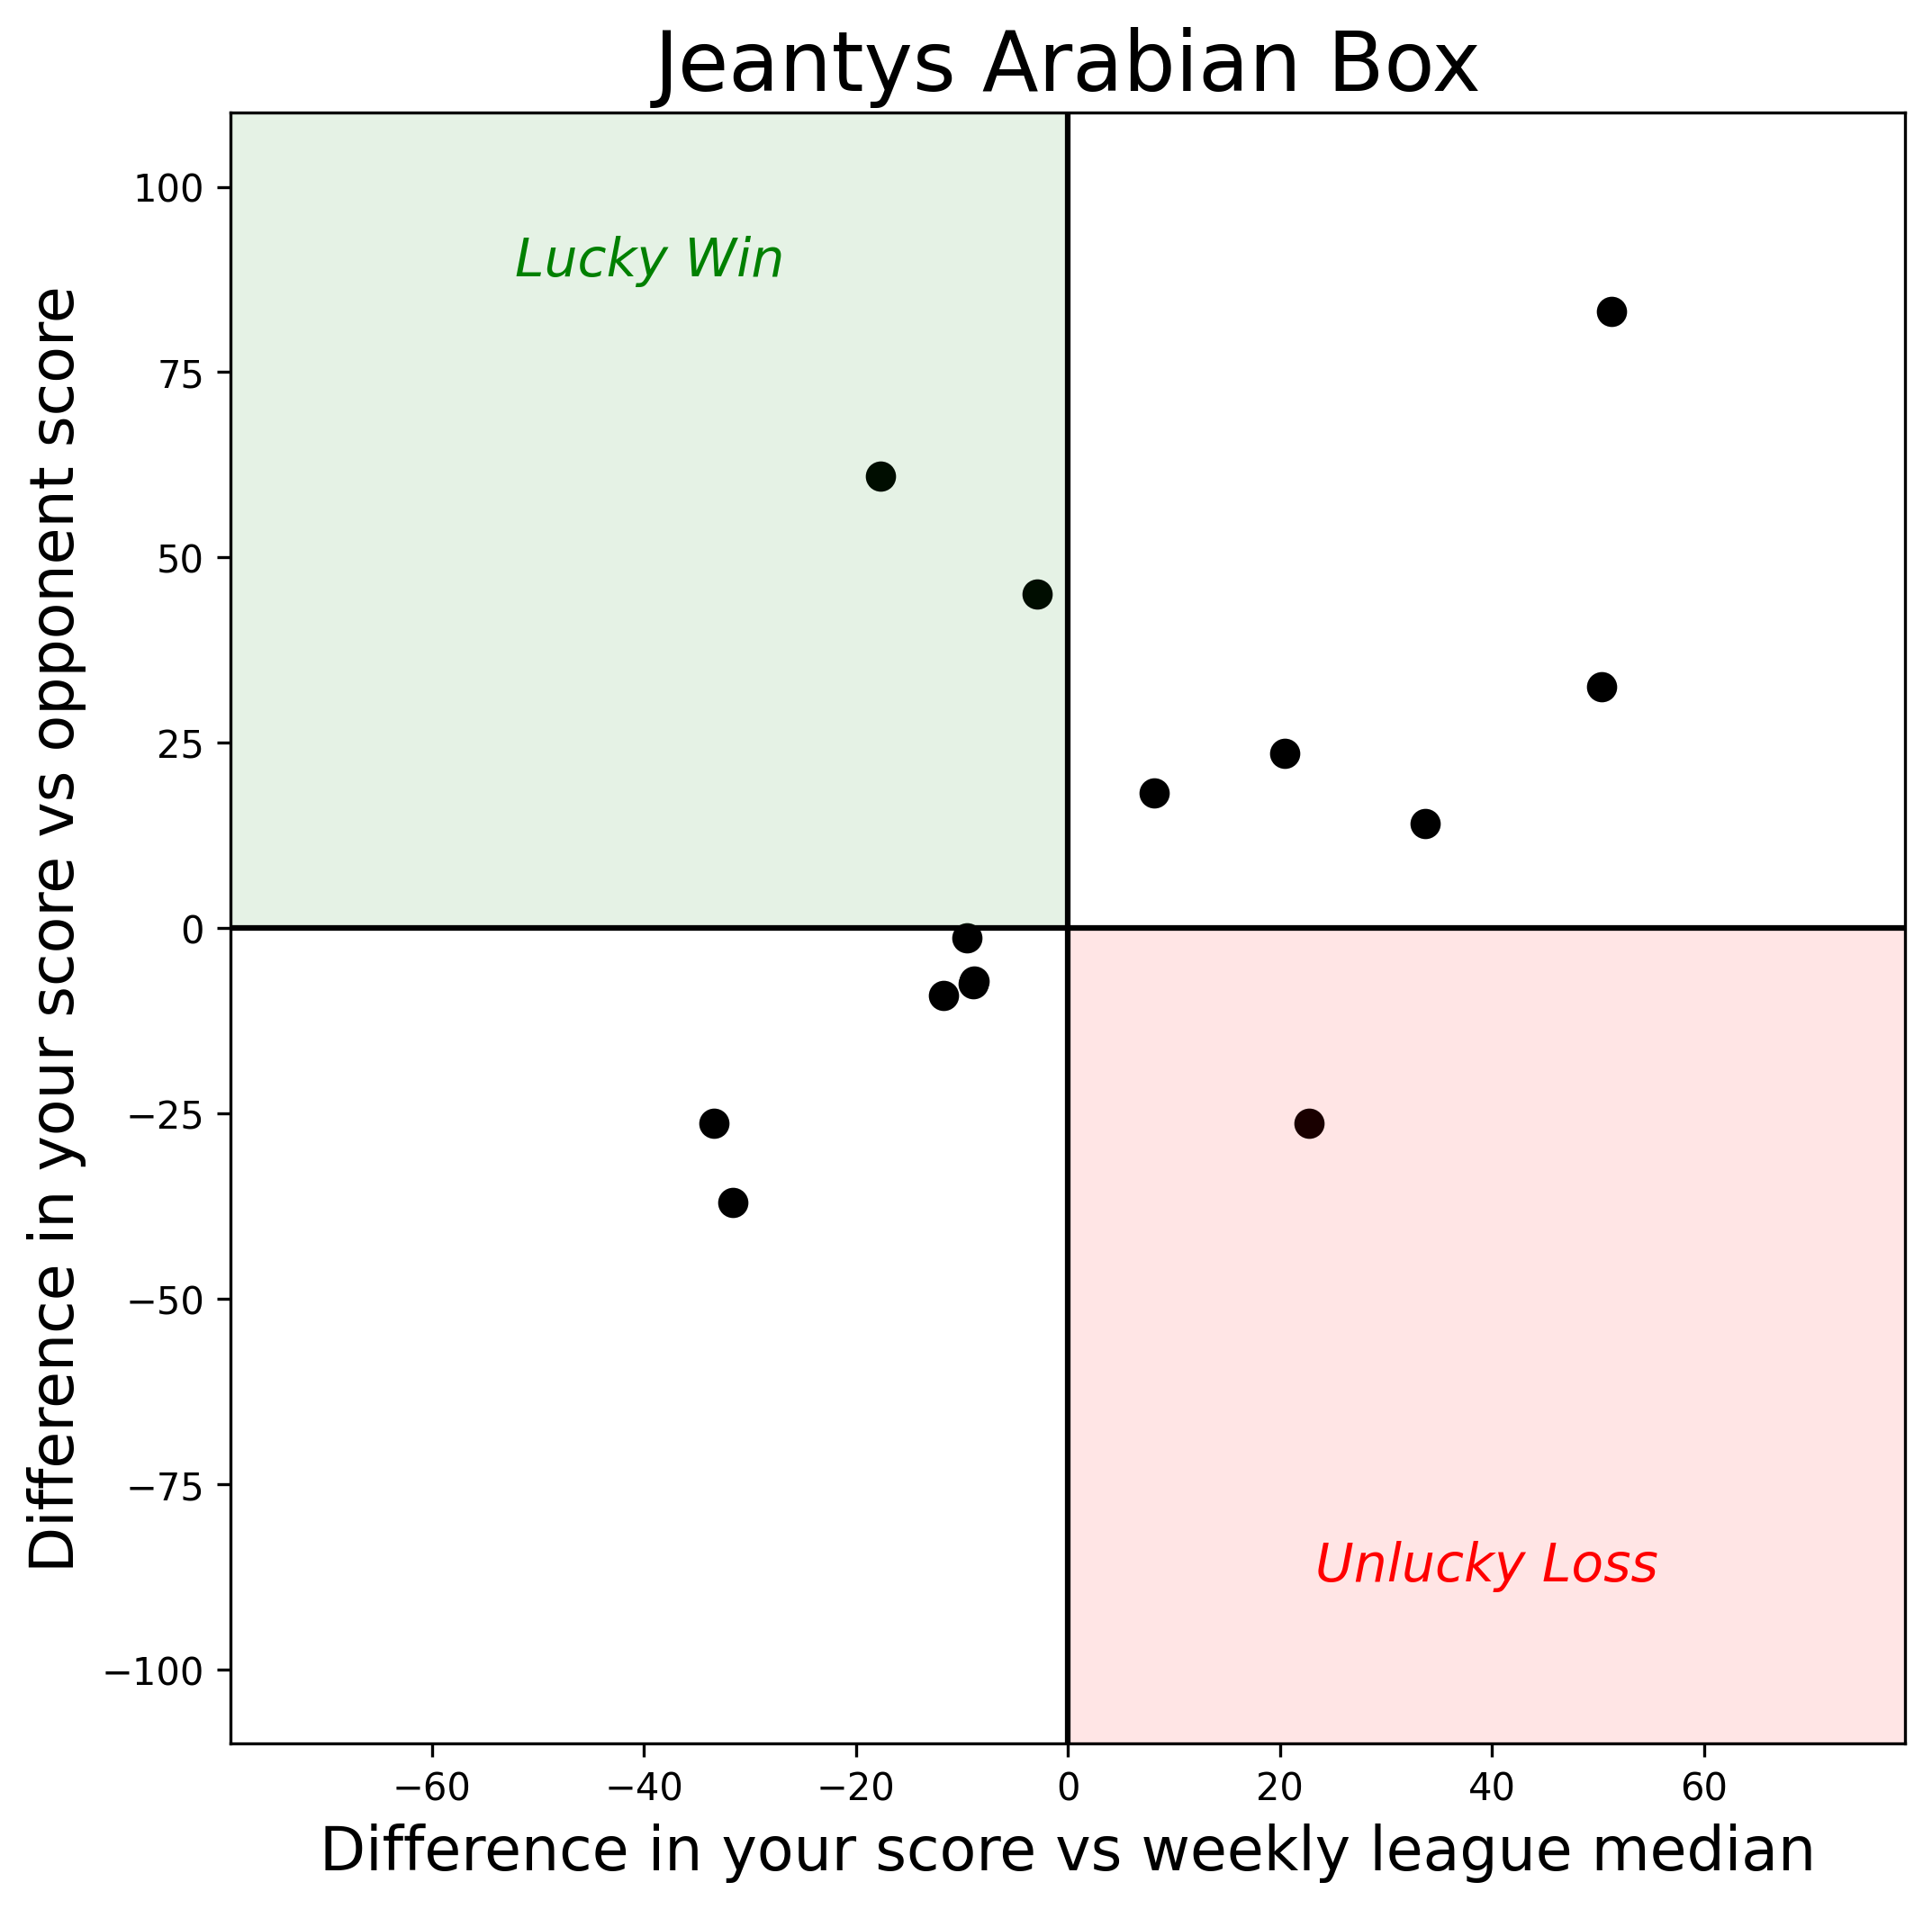

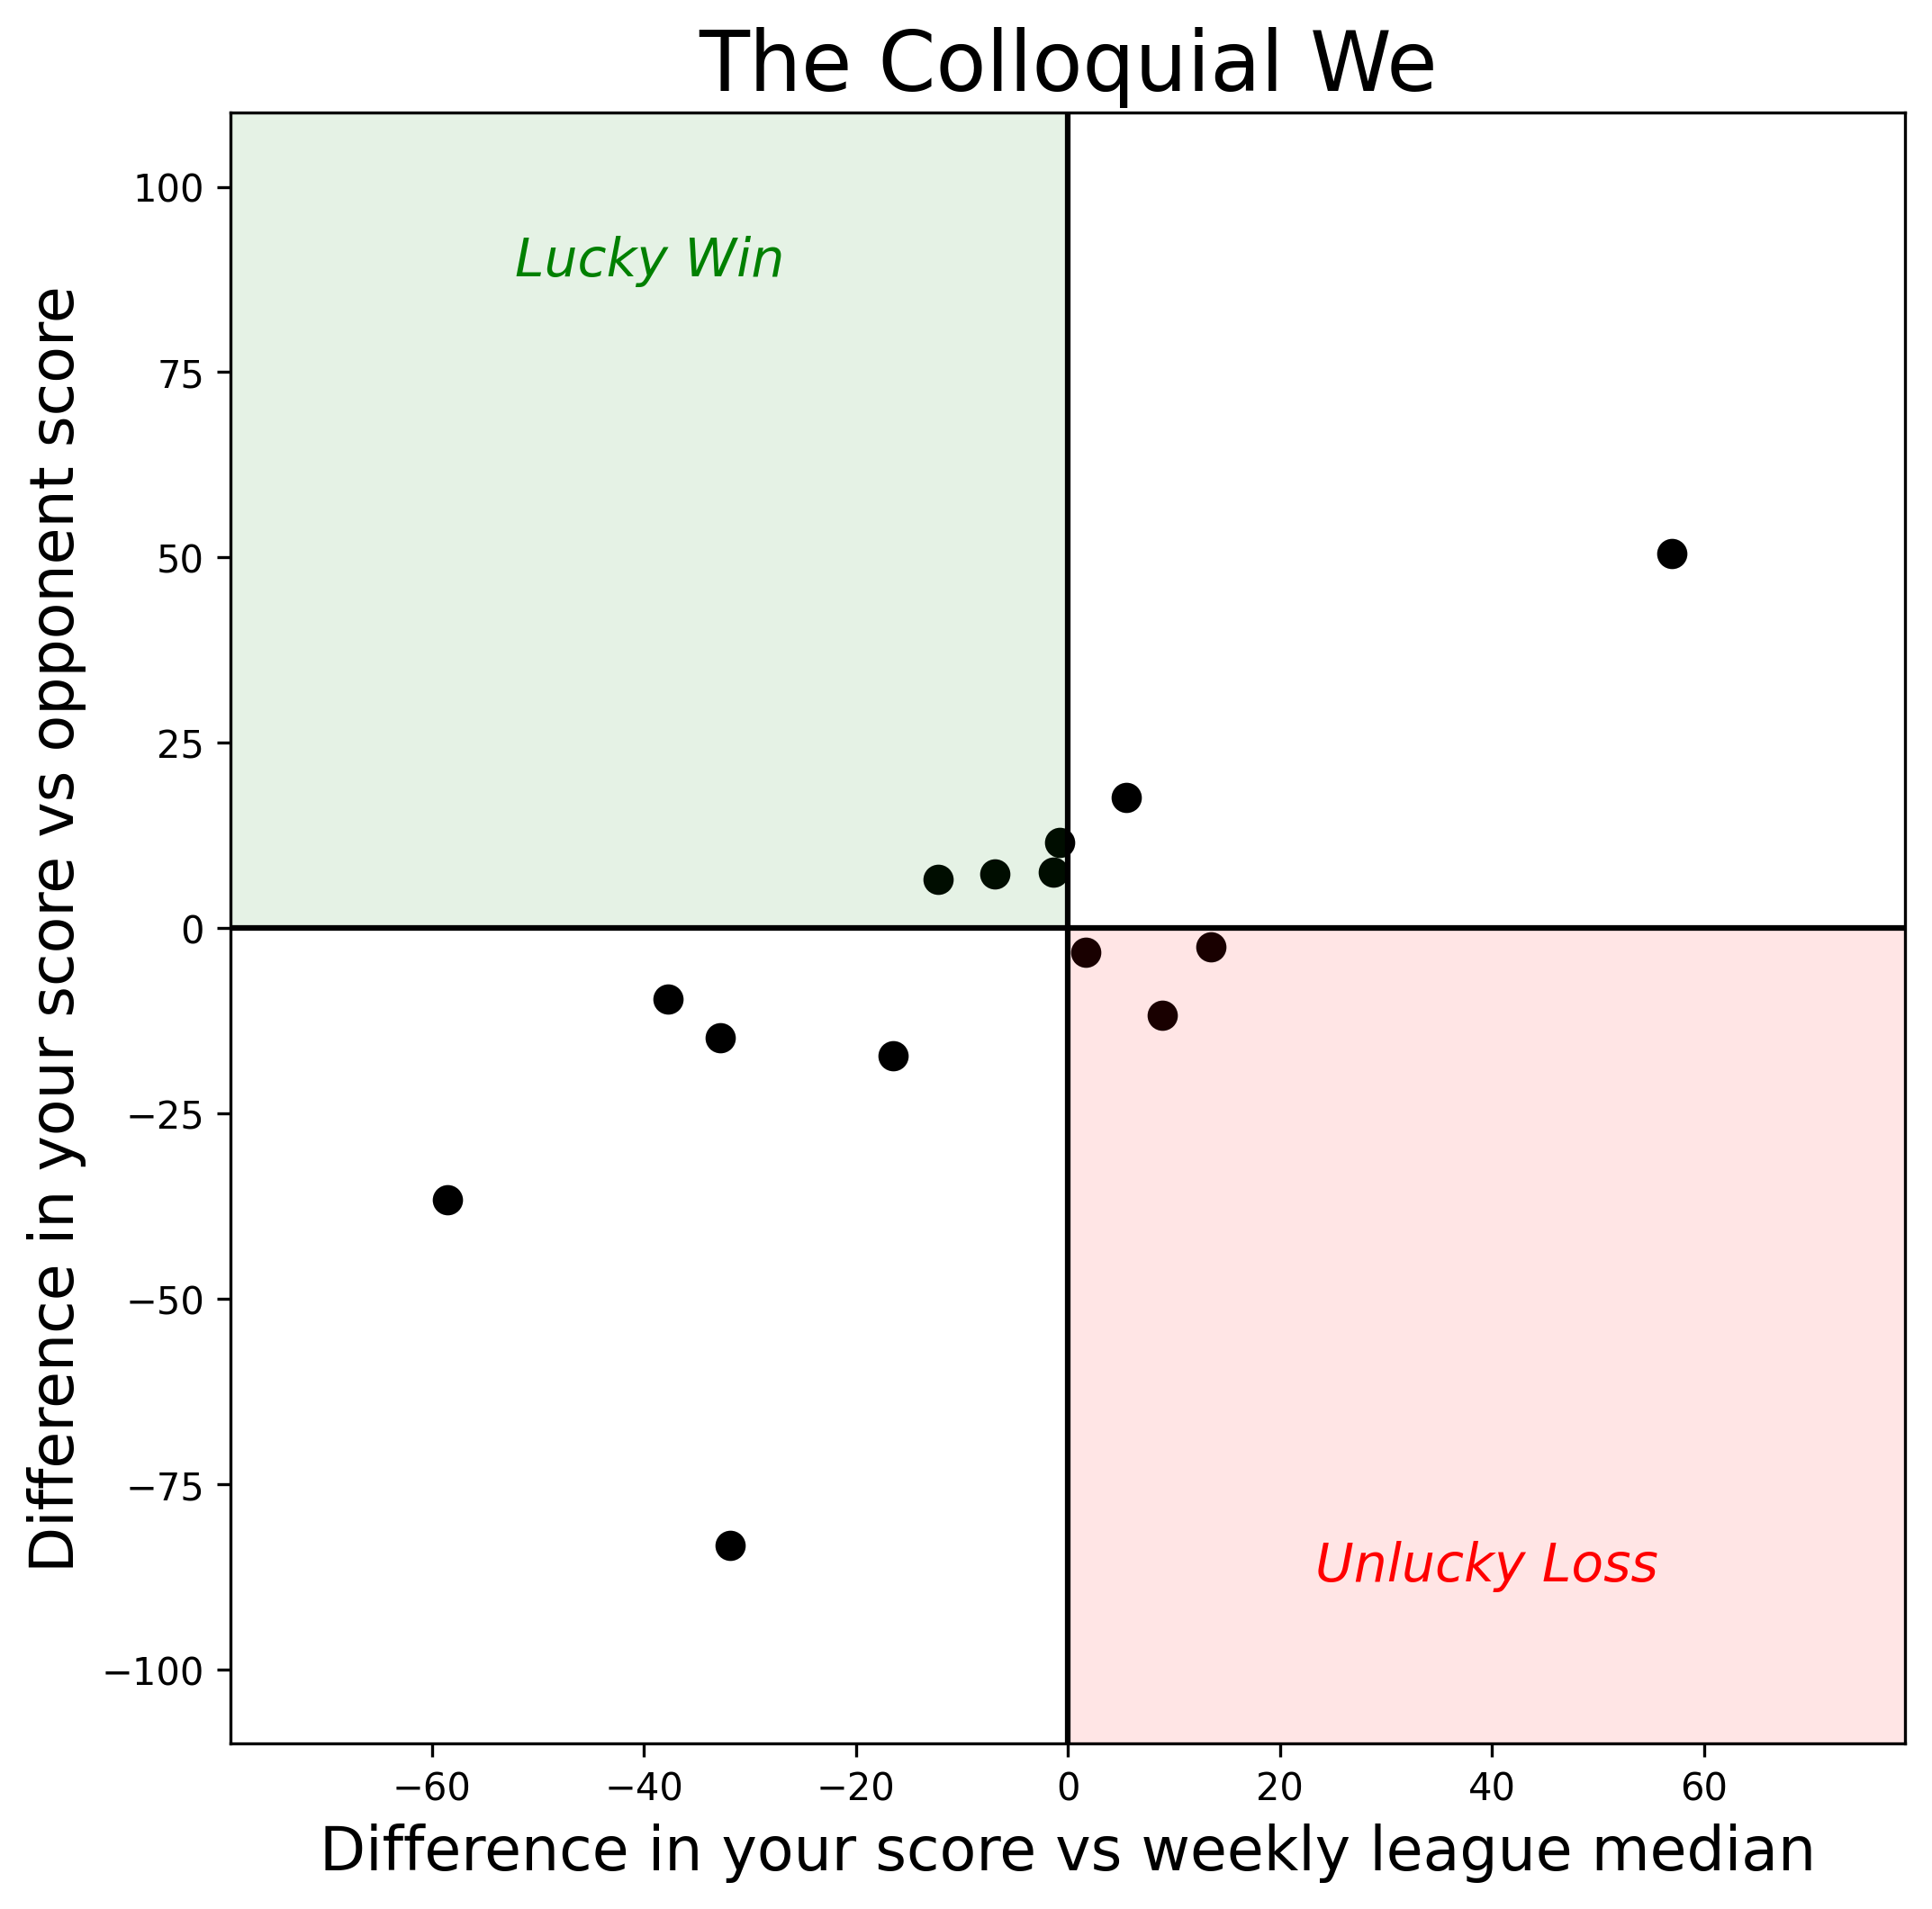

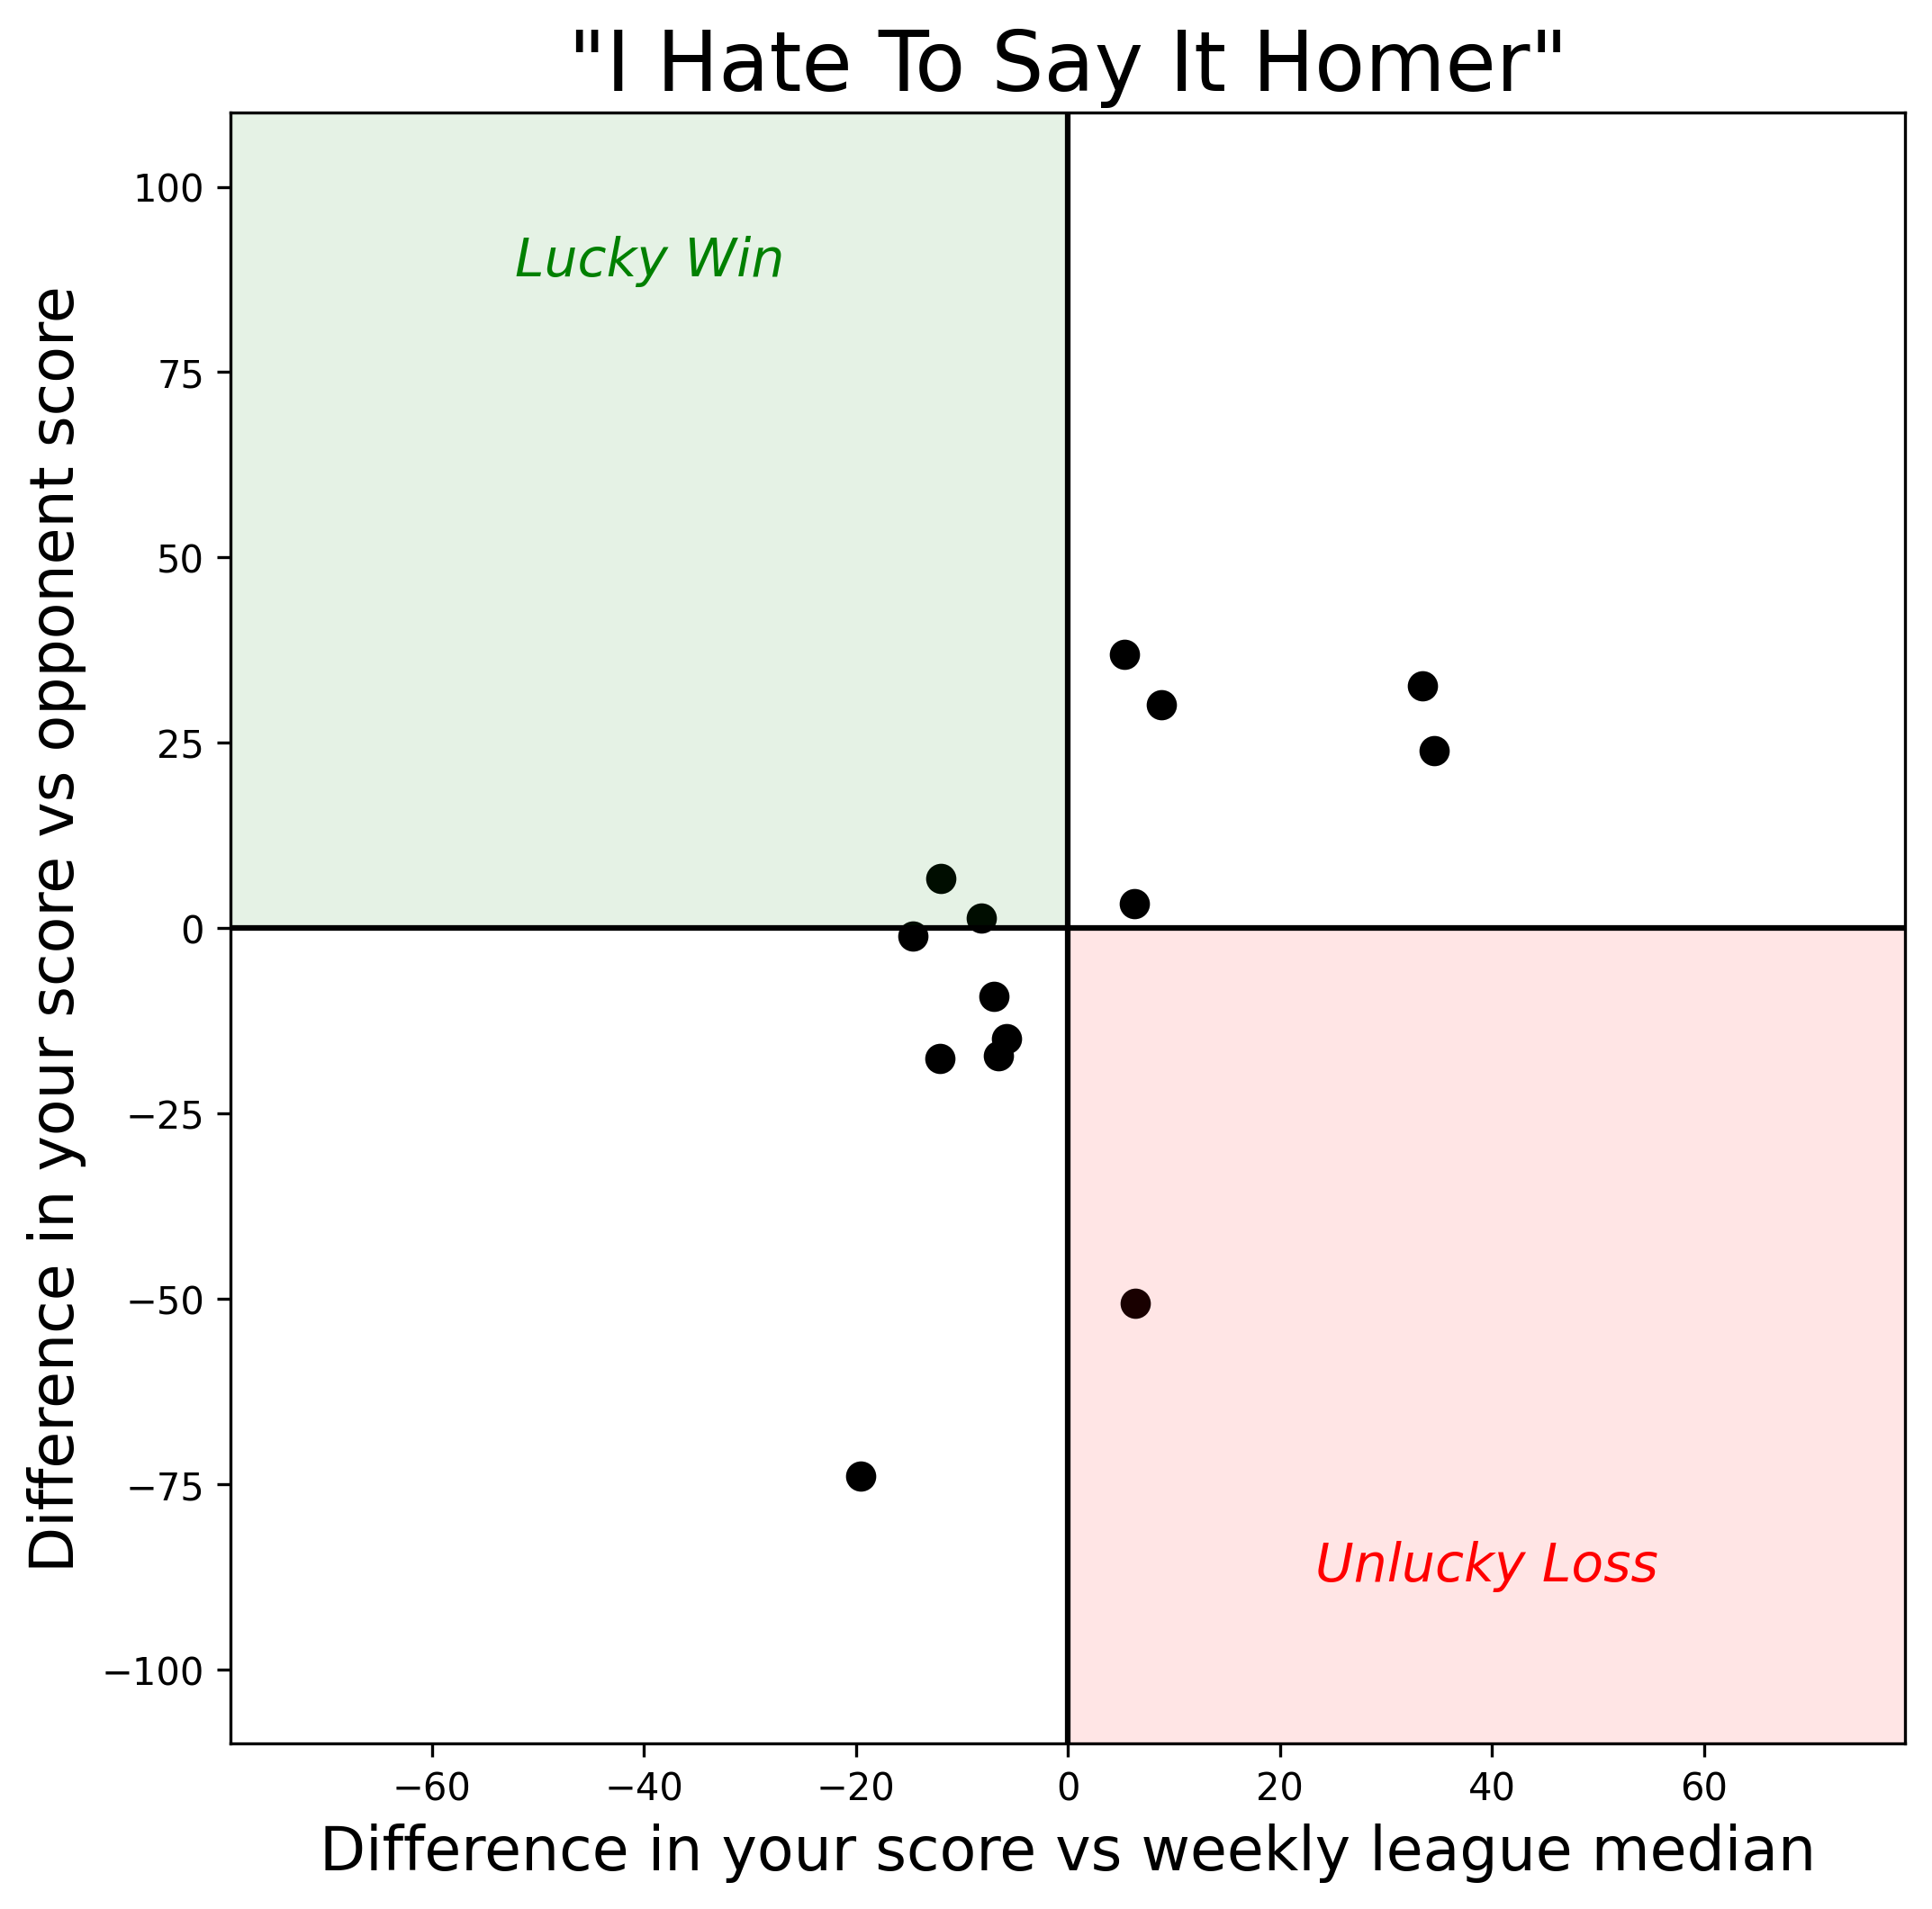

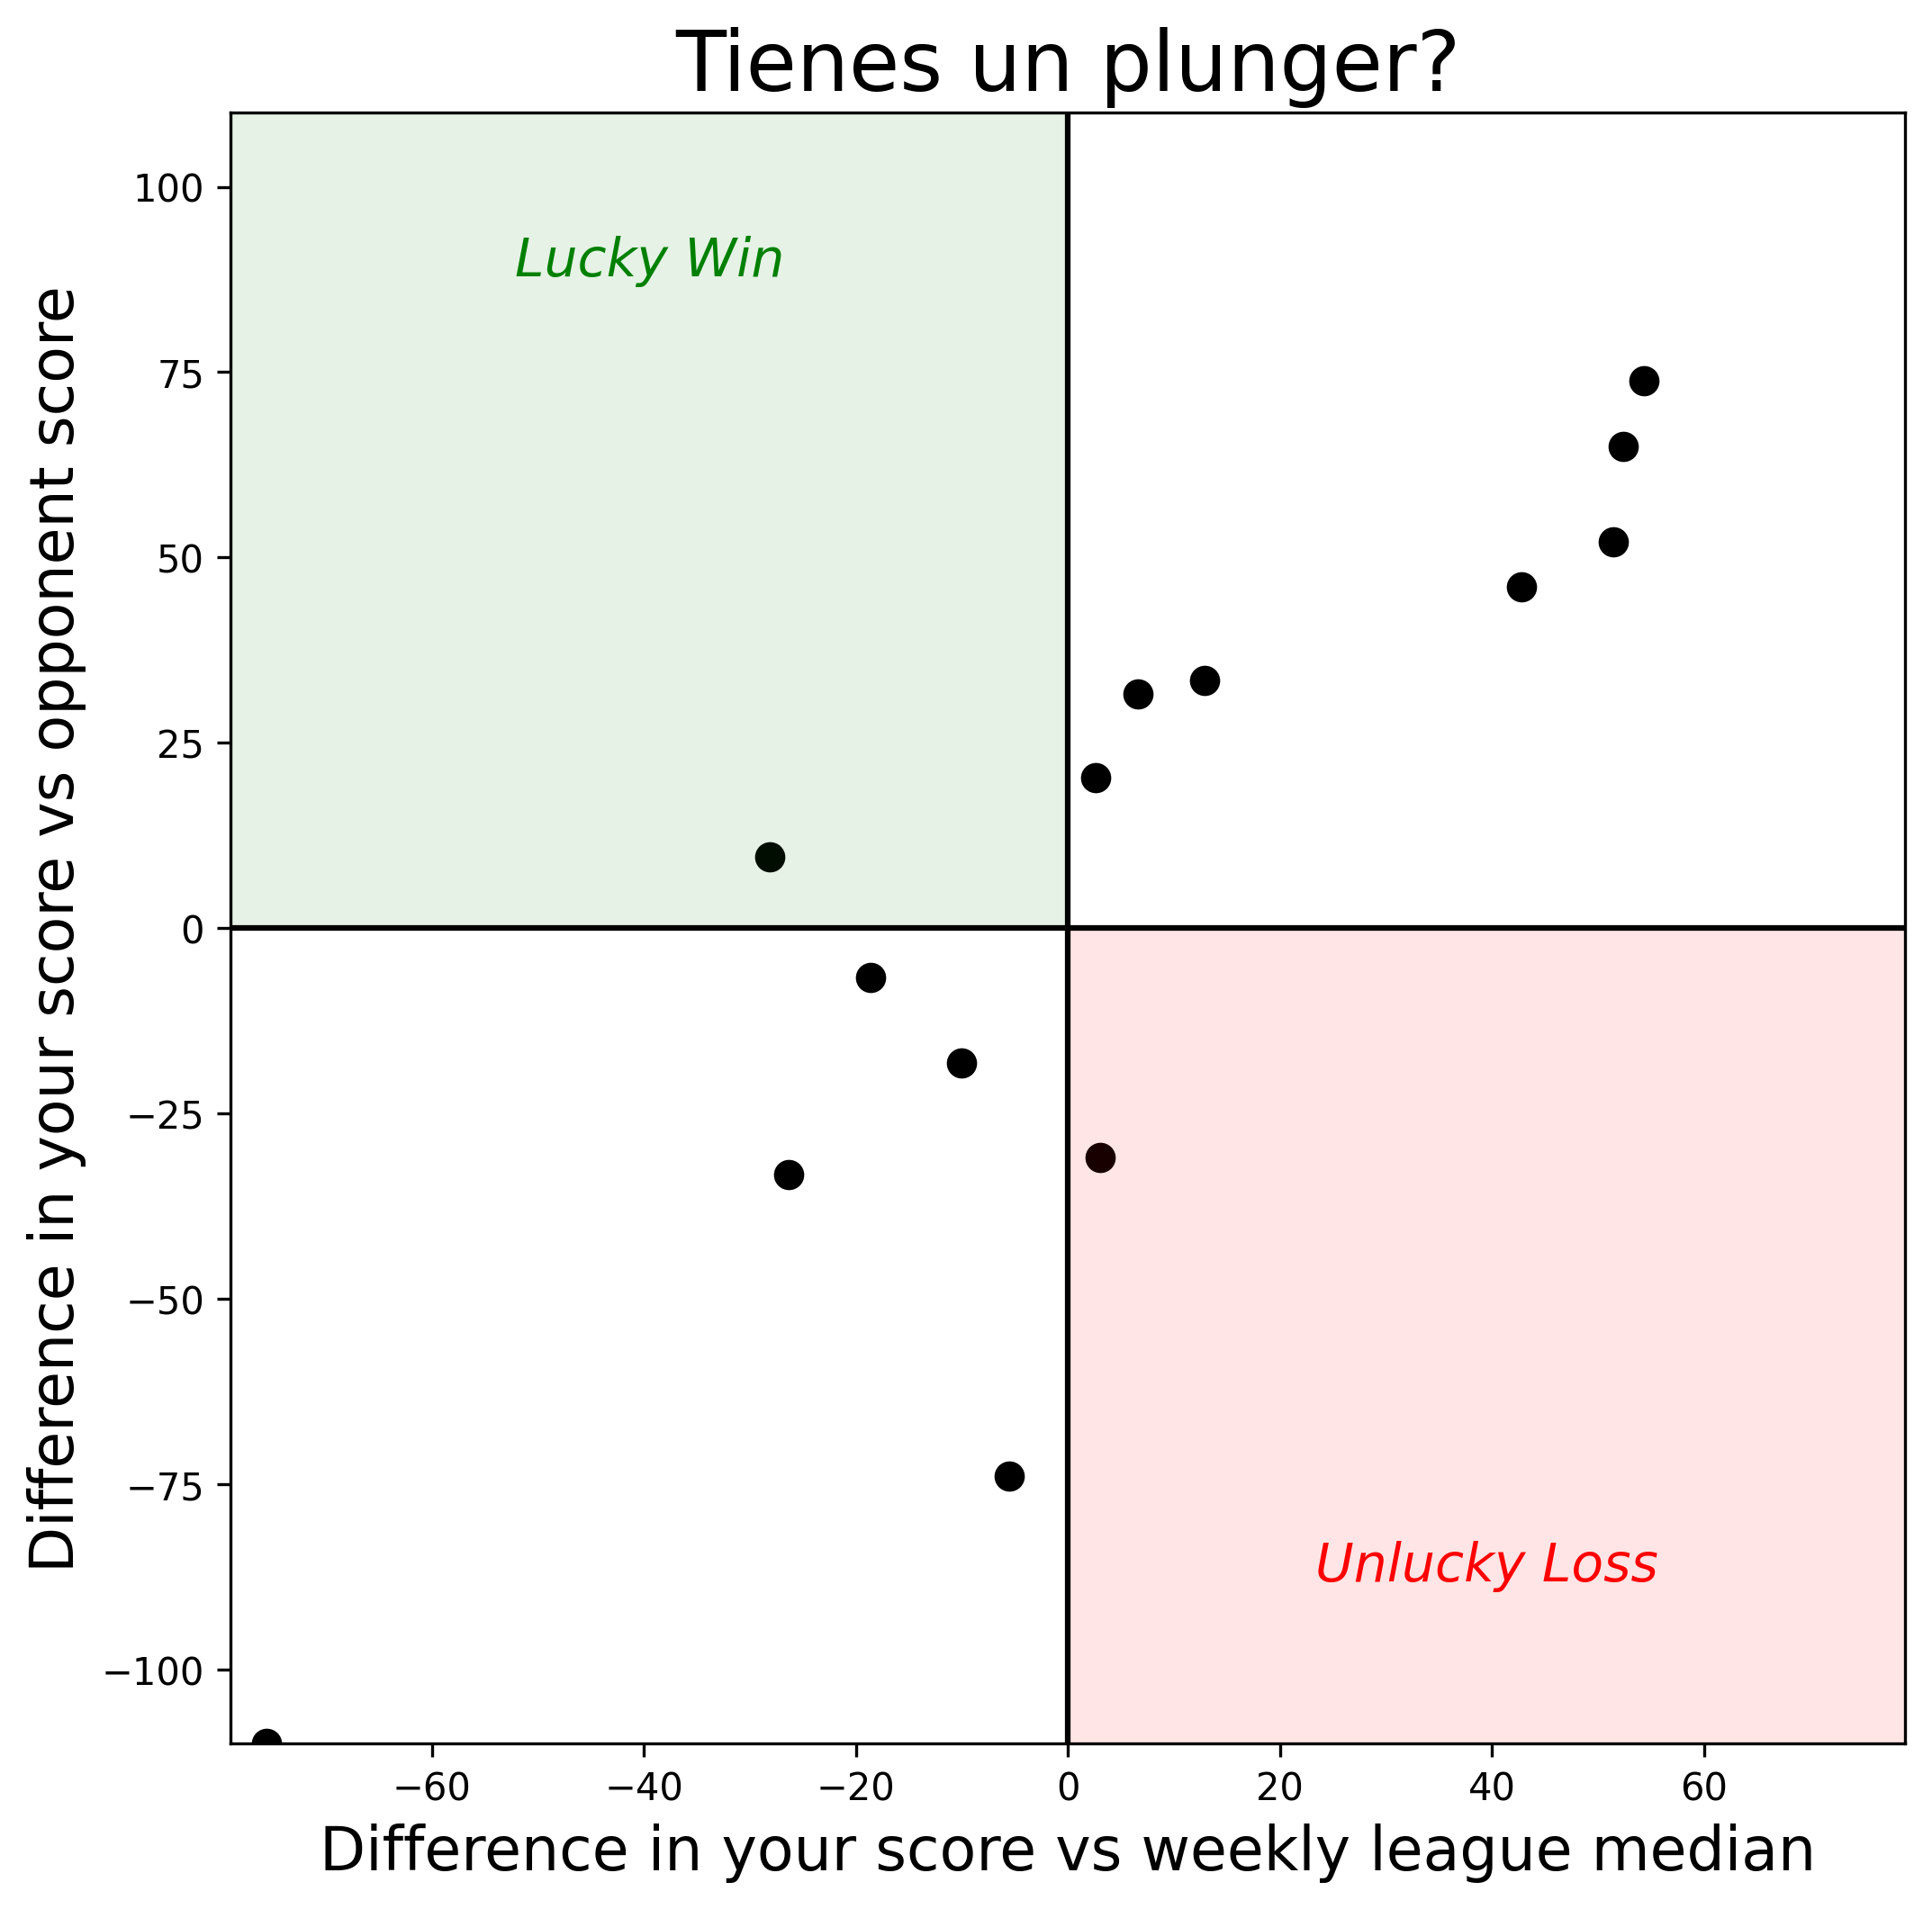

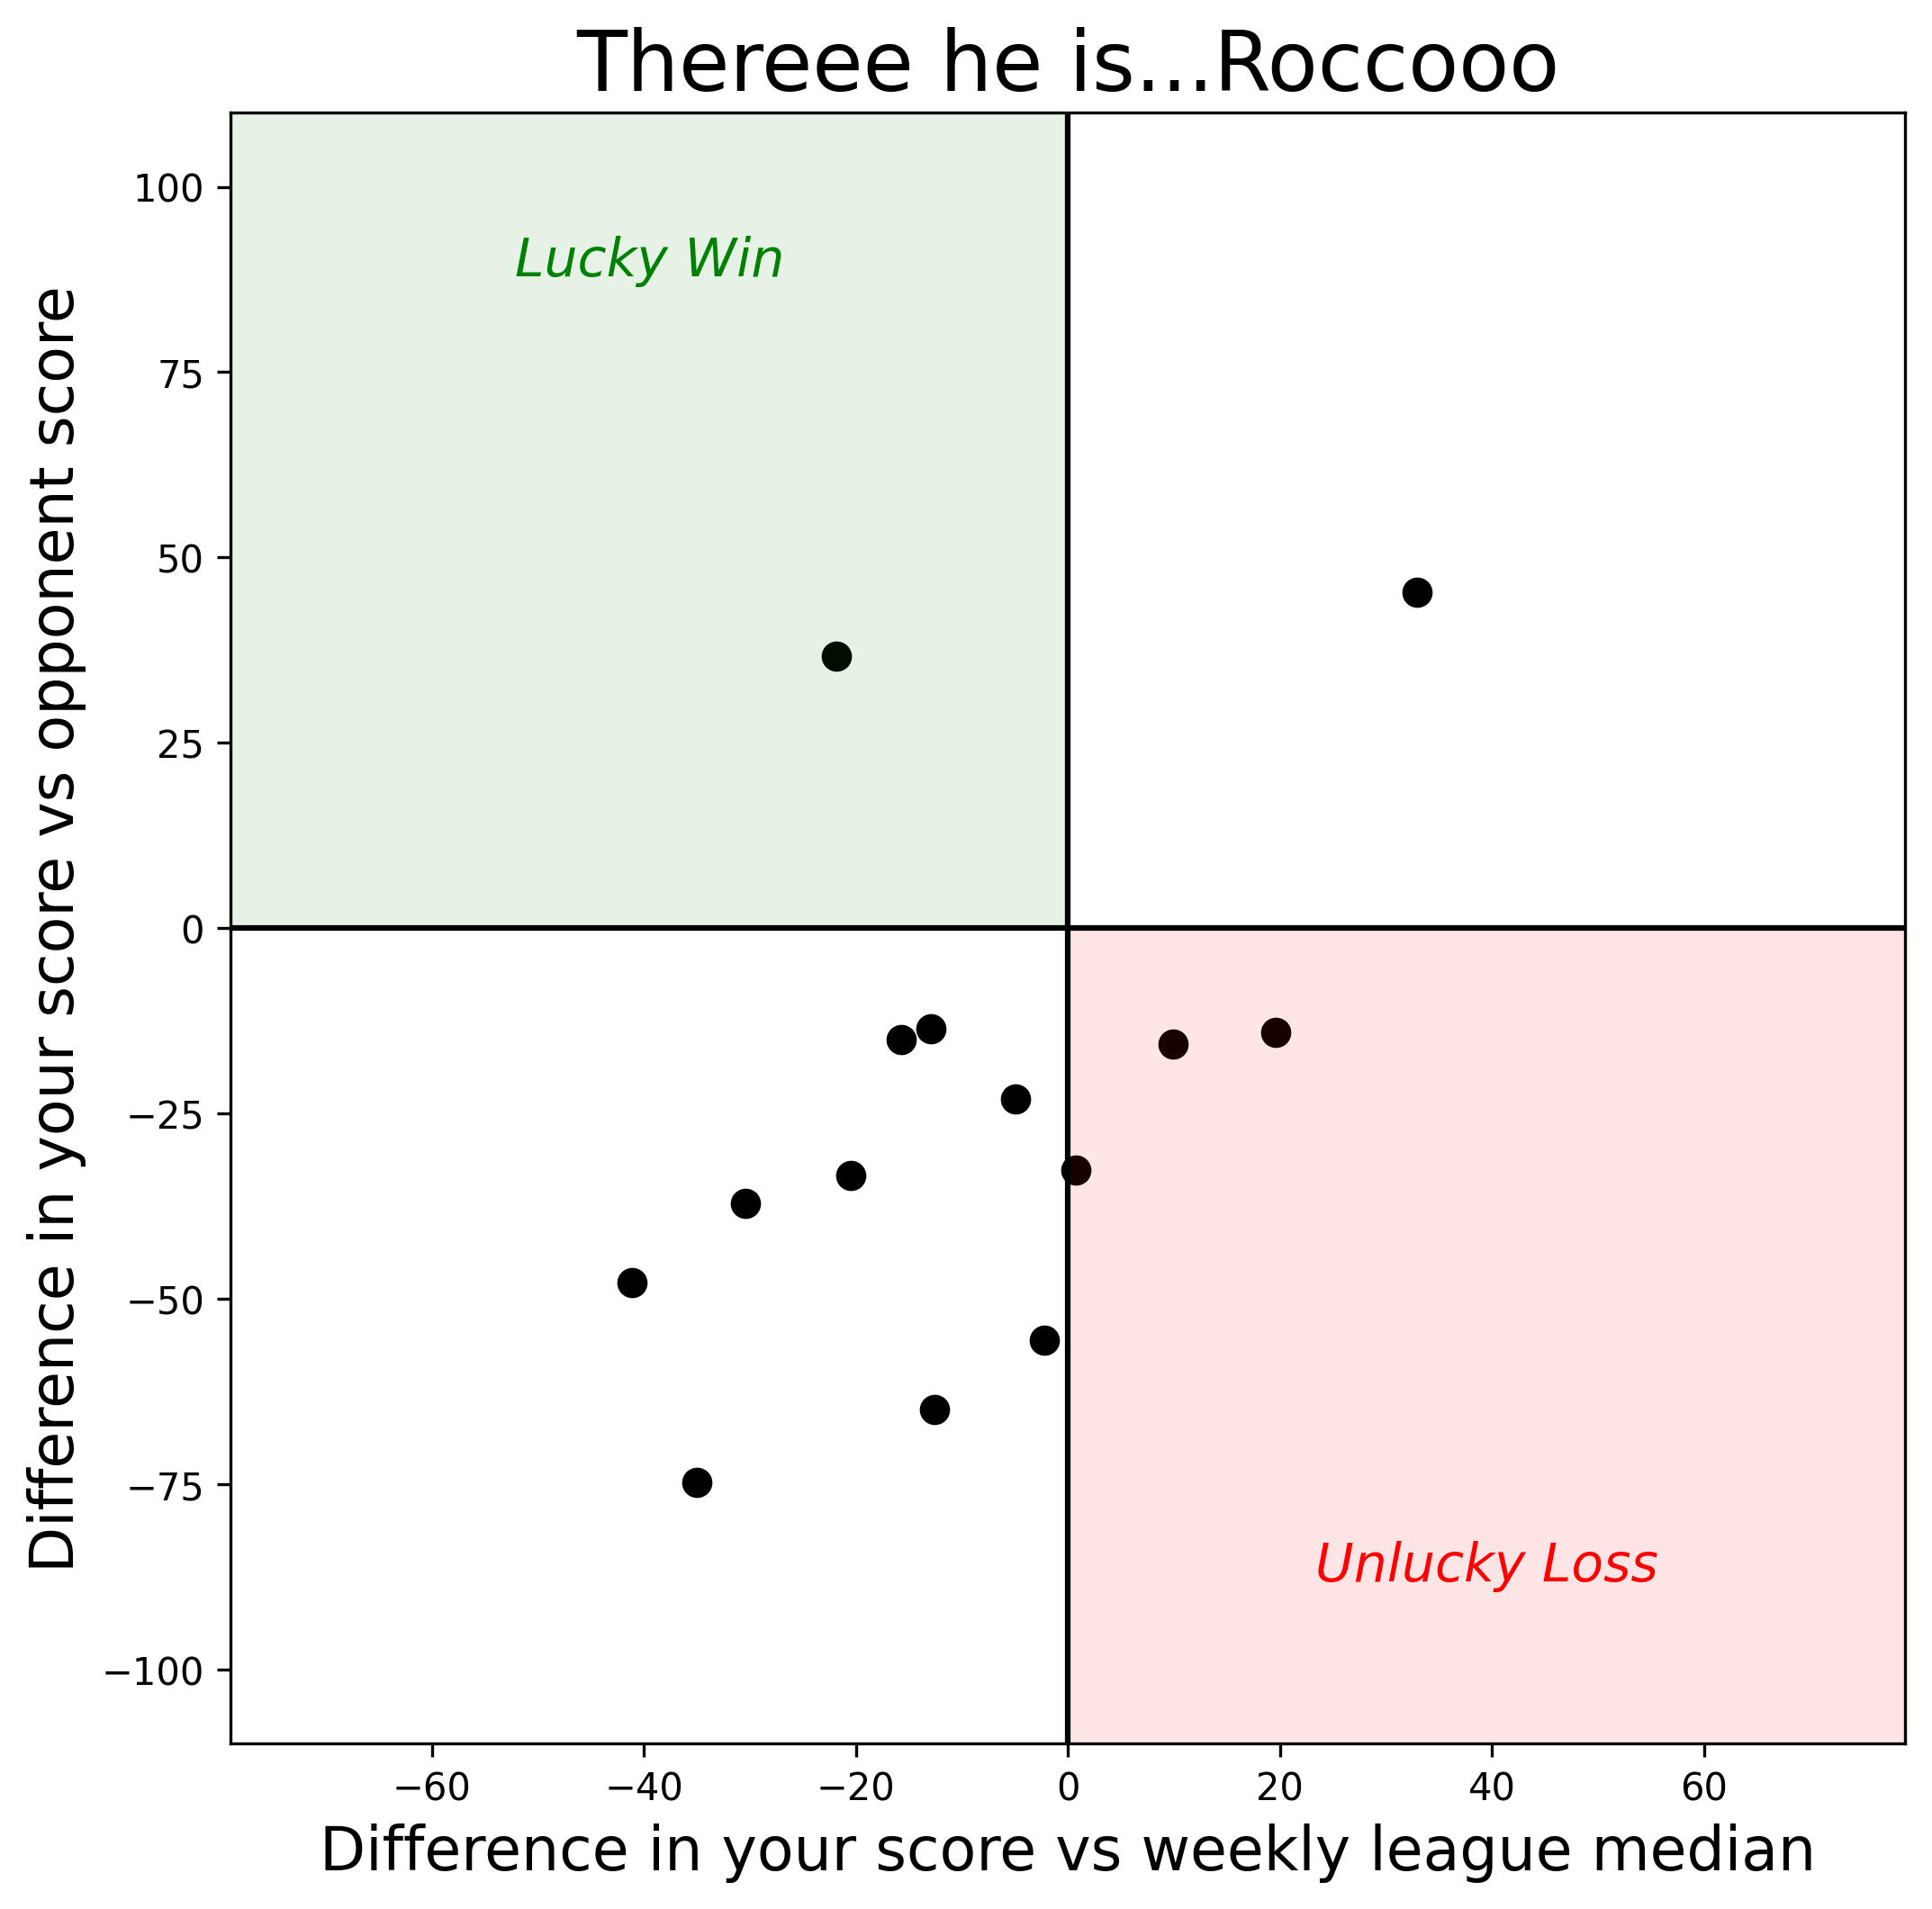

In [12]:
# Plot results

# Unluckly Loss = H2H loss when you were in top half of weekly scorers
# Lucky Win = H2H win when you were in bottom half of weekly scorers

# y axis: difference in your score vs opponent score
# x axis: difference in your score vs league median


x_bound = np.ceil(scores_df.abs().max().max())
y_bound = np.ceil(margins_df.abs().max().max())

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    
    plt.figure(figsize=[8,8])
    plt.scatter(x, y, color="black", s=50)
    plt.axhline(0, color='black')
    plt.axvline(0, color='black')
    plt.xlim(-x_bound, x_bound)
    plt.ylim(-y_bound, y_bound)
    plt.fill_between([0, -x_bound], 0, y_bound, facecolor='g', alpha=0.1)
    plt.fill_between([0, x_bound], 0, -y_bound, facecolor='r', alpha=0.1)
    plt.annotate("Lucky Win", xy=(-x_bound/2, y_bound*4/5), fontsize=14, ha="center", style="italic", color="g")
    plt.annotate("Unlucky Loss", xy=(x_bound/2, -y_bound*4/5), fontsize=14, ha="center", style="italic", color="r")
    plt.ylabel("Difference in your score vs opponent score", fontsize=16)
    plt.xlabel("Difference in your score vs weekly league median", fontsize=16)
    plt.title(team_map[scores_df.index.values[i]]["name"], fontsize=22)
    

In [13]:
# Summary table

for i in range(10):
    x = scores_df.values.tolist()[i]
    y = margins_df.values.tolist()[i]
    team = team_map[scores_df.index.values[i]]["name"]

    lw, ul = 0, 0
    for j in range(len(x)):
        if x[j] < 0 and y[j] > 0:
            lw += 1
        elif x[j] >0 and y[j] < 0:
            ul += 1
            
    print(team)
    print("Lucky Wins: {}".format(lw))
    print("Unlucky Losses: {}".format(ul))
    


Pitts and Pittman's Losers
Lucky Wins: 3
Unlucky Losses: 3
Mr. Money Machine
Lucky Wins: 1
Unlucky Losses: 0
Brunch and all u can eat buffet
Lucky Wins: 2
Unlucky Losses: 0
The Sour Undercarriage
Lucky Wins: 0
Unlucky Losses: 4
Lowkey By Design
Lucky Wins: 2
Unlucky Losses: 2
Jeantys Arabian Box
Lucky Wins: 2
Unlucky Losses: 1
The Colloquial We
Lucky Wins: 4
Unlucky Losses: 3
"I Hate To Say It Homer"
Lucky Wins: 2
Unlucky Losses: 1
Tienes un plunger?
Lucky Wins: 1
Unlucky Losses: 1
Thereee he is...Roccooo
Lucky Wins: 1
Unlucky Losses: 3
